>***Indian Food and Its Recipes***

<b style="color:orange;">Importing necessary libraries</b>

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re
from IPython.display import display, HTML
import matplotlib.patches as mpatches

In [261]:
df = pd.read_csv('cuisines.csv')
df

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions
0,Thayir Semiya Recipe (Curd Semiya),https://www.archanaskitchen.com/images/archana...,Thayir Semiya or Curd Vermicelli is a quick di...,Indian,Lunch,Vegetarian,Total in 35 M,\n\n\t\t\t\t\t\t\t \t\t1/2 cup Semiya (Vermice...,"To begin making the Thayir Semiya recipe, firs..."
1,Chettinad Style Kara Kuzhambu Recipe with Pota...,https://www.archanaskitchen.com/images/archana...,Chettinad Style Kara Kuzhambu Recipe with Pot...,South Indian Recipes,Lunch,Vegetarian,Total in 75 M,\nFor ground masala\n\n\t\t\t\t\t\t\t \t\t1/4 ...,To begin making the Chettinad Style Kara Kuzha...
2,Goan Chana Ros Recipe (White Peas Curry),https://www.archanaskitchen.com/images/archana...,Goan Chana Ros is a vegetarian dish from Goan ...,Goan Recipes,Lunch,Vegetarian,Total in 530 M,\n\n\t\t\t\t\t\t\t \t\t1/2 cup Dried Green Pea...,"To prepare Goan Chana Ros recipe, soak the whi..."
3,Minced Meat And Egg Croquettes Recipe,https://www.archanaskitchen.com/images/archana...,The croquette is usually cigar shaped or cylin...,North Indian Recipes,Appetizer,Non Vegeterian,Total in 55 M,\n\n\t\t\t\t\t\t\t \t\t500 grams Mutton\t\t\t\...,To begin making the Minced Meat And Egg Croque...
4,Thekera Tenga Recipe,https://www.archanaskitchen.com/images/archana...,Thekera Tenga is a Sour curry from Assamese cu...,Assamese,Dinner,Vegetarian,Total in 30 M,\n\n\t\t\t\t\t\t\t \t\t4 Potatoes (Aloo)\t\t\t...,"To begin making the Thekera Tenga recipe, Heat..."
...,...,...,...,...,...,...,...,...,...
4231,Stir Fry Green beans and Tofu with Panch Phoro...,https://www.archanaskitchen.com/images/archana...,Stir Fry Green beans and Tofu with Panch Phoro...,Bengali Recipes,Side Dish,Vegetarian,Total in 40 M,\n\n\t\t\t\t\t\t\t \t\t1 cup Green beans (Fren...,We begin making the Stir Fry Green beans and T...
4232,Dhuska Recipe (Rice Fried Bread),https://www.archanaskitchen.com/images/archana...,Dhuska is a traditional recipe from Jharkhand....,Jharkhand,Snack,Vegetarian,Total in 50 M,\n\n\t\t\t\t\t\t\t \t\t1 cup Basmati rice\t\t\...,"To begin making the Dhuska, grind rice and cha..."
4233,Khatta Meetha Petha Recipe (Yellow Pumpkin Sabzi),https://www.archanaskitchen.com/images/archana...,Khatta Meetha Petha or sweet and sour yellow p...,Indian,Lunch,Vegetarian,Total in 40 M,\n\n\t\t\t\t\t\t\t \t\t1 Kaddu (Parangikai/ Pu...,"To begin making the Yellow Pumpkin Sabzi, firs..."
4234,Patta Gobi Matar Nu Shaak Recipe (Cabbage & Pe...,https://www.archanaskitchen.com/images/archana...,Patta Gobi Matar Nu Shaak Recipe (Cabbage & Pe...,North Indian Recipes,Lunch,Vegetarian,Total in 25 M,\n\n\t\t\t\t\t\t\t \t\t3 cups Cabbage (Patta G...,"To begin making the Patta Gobi Matar Nu Shaak,..."


***Steps for performing EDA (Exploratory Data Analysis):***

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4236 entries, 0 to 4235
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          4236 non-null   object
 1   image_url     4236 non-null   object
 2   description   4236 non-null   object
 3   cuisine       4230 non-null   object
 4   course        4198 non-null   object
 5   diet          4199 non-null   object
 6   prep_time     4226 non-null   object
 7   ingredients   4236 non-null   object
 8   instructions  4236 non-null   object
dtypes: object(9)
memory usage: 298.0+ KB


>***1. Understand Data Structure***

In [263]:
numerical_features = df.select_dtypes(include=['int64','int32','float']).columns.tolist()
numerical_features

[]

In [264]:
categorical_features = df.select_dtypes(include=['object','category']).columns.tolist()
categorical_features

['name',
 'image_url',
 'description',
 'cuisine',
 'course',
 'diet',
 'prep_time',
 'ingredients',
 'instructions']

In [265]:
#text features

text_features=[]
categorical_features_cleaned=[]

for col in categorical_features:
    unique_ratio = df[col].nunique()/len(df)
    avg_length = df[col].astype(str).str.len().mean()

    if unique_ratio > 0.5 or avg_length > 20:
        text_features.append(col)
    else:
        categorical_features_cleaned.append(col)

print(f"::: Cleaned Categorical Features :::")
print(categorical_features_cleaned)
print()
print(f"::: Cleaned Text Features :::")
print(text_features)

::: Cleaned Categorical Features :::
['cuisine', 'course', 'diet', 'prep_time']

::: Cleaned Text Features :::
['name', 'image_url', 'description', 'ingredients', 'instructions']


>***2. Data Cleaning***

In [266]:
# for val in df['prep_time'].values:
#     numerical = re.search("[0-9][0-9]",str(val))
#     if numerical:
#         print(numerical.group())

In [267]:
#extrcting only
df['prep_time']=df['prep_time'].astype(str).str.extract(r"(\d+)")

In [268]:
#removing extra spaces, tabs and newline characters
df['ingredients'] = df['ingredients'].astype(str).str.replace(r"\s+"," ",regex=True).str.strip()

In [269]:
df['diet'] = df['diet'].astype(str).str.strip().str.title().replace({
    "Non Vegeterian": "Non Vegetarian"
})

df['diet'] = df['diet'].replace("Nan","Unknown")

In [270]:
# Find duplicate rows
duplicates = df[df.duplicated()]
# print(duplicates)

# Keep only the first occurrence
df_cleaned = df.drop_duplicates()

# OR keep the last occurrence
# df = df.drop_duplicates(keep='last')

In [271]:
df_cleaned.shape

(4226, 9)

In [272]:
df.shape

(4236, 9)

In [273]:
duplicate_rows_dropped = df.shape[0]-df_cleaned.shape[0]
print(f"Number of duplicates rows ::: {duplicate_rows_dropped}")

Number of duplicates rows ::: 10


In [274]:
df_cleaned

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions
0,Thayir Semiya Recipe (Curd Semiya),https://www.archanaskitchen.com/images/archana...,Thayir Semiya or Curd Vermicelli is a quick di...,Indian,Lunch,Vegetarian,35,"1/2 cup Semiya (Vermicelli) , roasted 1 cup Cu...","To begin making the Thayir Semiya recipe, firs..."
1,Chettinad Style Kara Kuzhambu Recipe with Pota...,https://www.archanaskitchen.com/images/archana...,Chettinad Style Kara Kuzhambu Recipe with Pot...,South Indian Recipes,Lunch,Vegetarian,75,For ground masala 1/4 teaspoon Methi Seeds (Fe...,To begin making the Chettinad Style Kara Kuzha...
2,Goan Chana Ros Recipe (White Peas Curry),https://www.archanaskitchen.com/images/archana...,Goan Chana Ros is a vegetarian dish from Goan ...,Goan Recipes,Lunch,Vegetarian,530,"1/2 cup Dried Green Peas (Vatana) , soaked ove...","To prepare Goan Chana Ros recipe, soak the whi..."
3,Minced Meat And Egg Croquettes Recipe,https://www.archanaskitchen.com/images/archana...,The croquette is usually cigar shaped or cylin...,North Indian Recipes,Appetizer,Non Vegetarian,55,"500 grams Mutton , minced 4 Whole Eggs , boile...",To begin making the Minced Meat And Egg Croque...
4,Thekera Tenga Recipe,https://www.archanaskitchen.com/images/archana...,Thekera Tenga is a Sour curry from Assamese cu...,Assamese,Dinner,Vegetarian,30,"4 Potatoes (Aloo) , thinly sliced 1 tablespoon...","To begin making the Thekera Tenga recipe, Heat..."
...,...,...,...,...,...,...,...,...,...
4231,Stir Fry Green beans and Tofu with Panch Phoro...,https://www.archanaskitchen.com/images/archana...,Stir Fry Green beans and Tofu with Panch Phoro...,Bengali Recipes,Side Dish,Vegetarian,40,"1 cup Green beans (French Beans) , chopped int...",We begin making the Stir Fry Green beans and T...
4232,Dhuska Recipe (Rice Fried Bread),https://www.archanaskitchen.com/images/archana...,Dhuska is a traditional recipe from Jharkhand....,Jharkhand,Snack,Vegetarian,50,"1 cup Basmati rice , washed and soaked in wate...","To begin making the Dhuska, grind rice and cha..."
4233,Khatta Meetha Petha Recipe (Yellow Pumpkin Sabzi),https://www.archanaskitchen.com/images/archana...,Khatta Meetha Petha or sweet and sour yellow p...,Indian,Lunch,Vegetarian,40,1 Kaddu (Parangikai/ Pumpkin) 4 Green Chillies...,"To begin making the Yellow Pumpkin Sabzi, firs..."
4234,Patta Gobi Matar Nu Shaak Recipe (Cabbage & Pe...,https://www.archanaskitchen.com/images/archana...,Patta Gobi Matar Nu Shaak Recipe (Cabbage & Pe...,North Indian Recipes,Lunch,Vegetarian,25,"3 cups Cabbage (Patta Gobi/ Muttaikose) , fine...","To begin making the Patta Gobi Matar Nu Shaak,..."


>***3.Univariate Analysis***

<b>A.</b> Distribution of cuisine (top cuisines).

In [275]:
#count cuisine according to cuisine.
data_cuisine = df.groupby('cuisine').count()['name']
print(f"Cuisine :")
print()
print(data_cuisine)

Cuisine :

cuisine
Afghan                         1
African                        1
Andhra                       116
Arab                           1
Asian                          8
Assamese                      26
Awadhi                        37
Bengali Recipes              164
Bihari                        22
Chettinad                     70
Chinese                        2
Coastal Karnataka             14
Continental                    5
Coorg                         15
Fusion                        16
Goan Recipes                  83
Gujarati Recipes﻿            124
Haryana                        3
Himachal                      17
Hyderabadi                    29
Indian                       809
Indo Chinese                   5
Jharkhand                      2
Karnataka                    133
Kashmiri                      59
Kerala Recipes               159
Kongunadu                      3
Konkan                        32
Lucknowi                       9
Maharashtrian Recipes   

In [276]:
cuisine_names = data_cuisine.index.tolist()
cuisine_values = data_cuisine.values.tolist()

# Create a DataFrame
cuisine_df = pd.DataFrame({'cuisine': cuisine_names, 'count': cuisine_values})
print("Top cuisine DataFrame")
print()
cuisine_df

Top cuisine DataFrame



,cuisine,count
0,Afghan,1
1,African,1
2,Andhra,116
3,Arab,1
4,Asian,8
5,Assamese,26
6,Awadhi,37
7,Bengali Recipes,164
8,Bihari,22
9,Chettinad,70


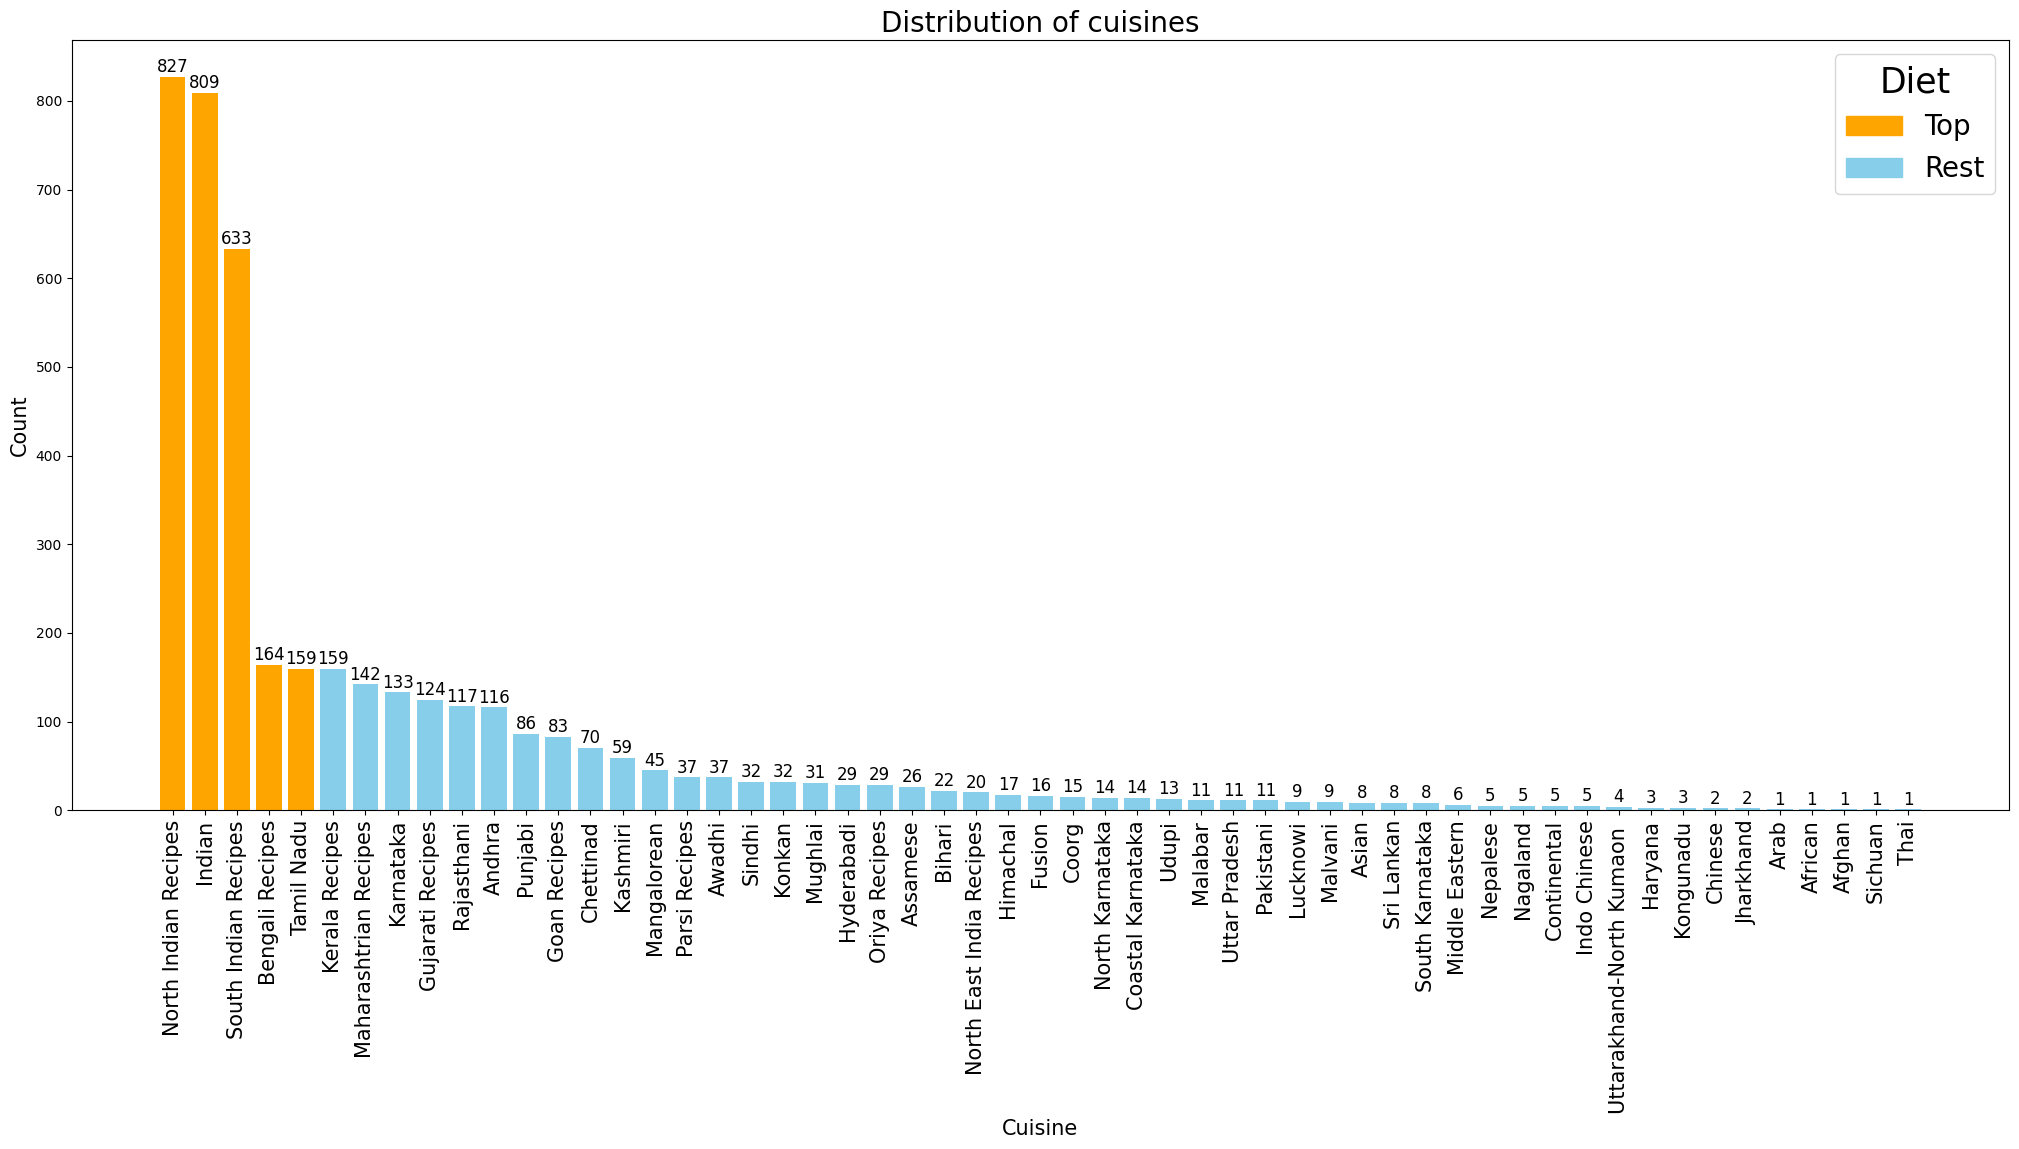

In [277]:
# Sort in descending order
top_cuisines = cuisine_df.sort_values(by='count', ascending=False).reset_index(drop=True)

top_5 = 5

# Assign colors
colors = ['orange' if i < top_5 else 'skyblue' for i in range(len(top_cuisines))]

plt.figure(figsize=(25,10))
# bars = plt.bar(cuisine_names,cuisine_values,color=colors)
bars = plt.bar(top_cuisines['cuisine'],top_cuisines['count'],color=colors)

plt.xticks(rotation=90, fontsize=15)

# Create legend manually
legend_handles = [
    mpatches.Patch(color="orange", label="Top"),
    mpatches.Patch(color="skyblue", label="Rest")
]

plt.legend(handles=legend_handles, 
           title="Diet", 
           title_fontsize=25,   # title size
           fontsize=20,         # legend text size
           loc="upper right",   # placement
           bbox_to_anchor=(1, 1))  # fine-tune position

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height+1,str(height),ha="center",va="bottom", fontsize=12)

plt.xlabel("Cuisine", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Distribution of cuisines", fontsize=20)
# plt.savefig("1.Distribution of cuisines with top highlighted.png", bbox_inches='tight')
plt.show()

<h3>✅ Explanation</h3>
<p><strong>bar.get_height()</strong> → gets the value (height) of each bar.</p>
<p><strong>plt.text(x, y, text, ha='center', va='bottom')</strong> → places the text on top of the bar:</p>
<ul>
  <li><strong>x</strong> → the center position of the bar</li>
  <li><strong>y</strong> → a little above the bar (height + 1)</li>
  <li><strong>ha='center'</strong> → horizontally centers the text</li>
  <li><strong>va='bottom'</strong> → vertically places the text just above the bar</li>
</ul>

<p>✅ Explanation:</p>
<ul>
  <li><code>bbox_inches='tight'</code> ensures that the saved figure includes all labels, titles, and margins.</li>
  <li>This is especially useful when the x-axis labels are rotated or very long.</li>
  <li>You can also adjust <code>figsize</code> if you need more horizontal space for the plot.</li>
</ul>

<h2>Insights from Cuisine Distribution</h2>
<ul>
  <li><b>North Indian, South Indian, and Indian recipes</b> dominate with over <b>600–800 recipes each</b>.</li>
  <li><b>Bengali, Tamil Nadu, Kerala, and Maharashtrian</b> cuisines are moderately represented (100–160 recipes).</li>
  <li>Smaller cuisines like <b>Thai, Afghan, African</b> have very few recipes (1–5 only).</li>
  <li>The dataset is <b>highly skewed towards Indian regional cuisines</b>.</li>
</ul>

<b>B.</b>Distribution of course (most common meal type).

In [278]:
data_course = df.groupby('course').count()['name']
print("Course with counts:")
print()
data_course

Course with counts:



course
Appetizer                   91
Brunch                       1
Dessert                    389
Dinner                     442
Indian Breakfast            77
Lunch                     1638
Main Course                203
North Indian Breakfast     119
One Pot Dish                19
Side Dish                  855
Snack                       82
South Indian Breakfast     275
World Breakfast              7
Name: name, dtype: int64

In [279]:
data_course_name = data_course.index.tolist()
data_course_count = data_course.values.tolist()

#create dataFrame
df_course = pd.DataFrame({
    'name':data_course_name,'count':data_course_count
})
df_course

,name,count
0,Appetizer,91
1,Brunch,1
2,Dessert,389
3,Dinner,442
4,Indian Breakfast,77
5,Lunch,1638
6,Main Course,203
7,North Indian Breakfast,119
8,One Pot Dish,19
9,Side Dish,855


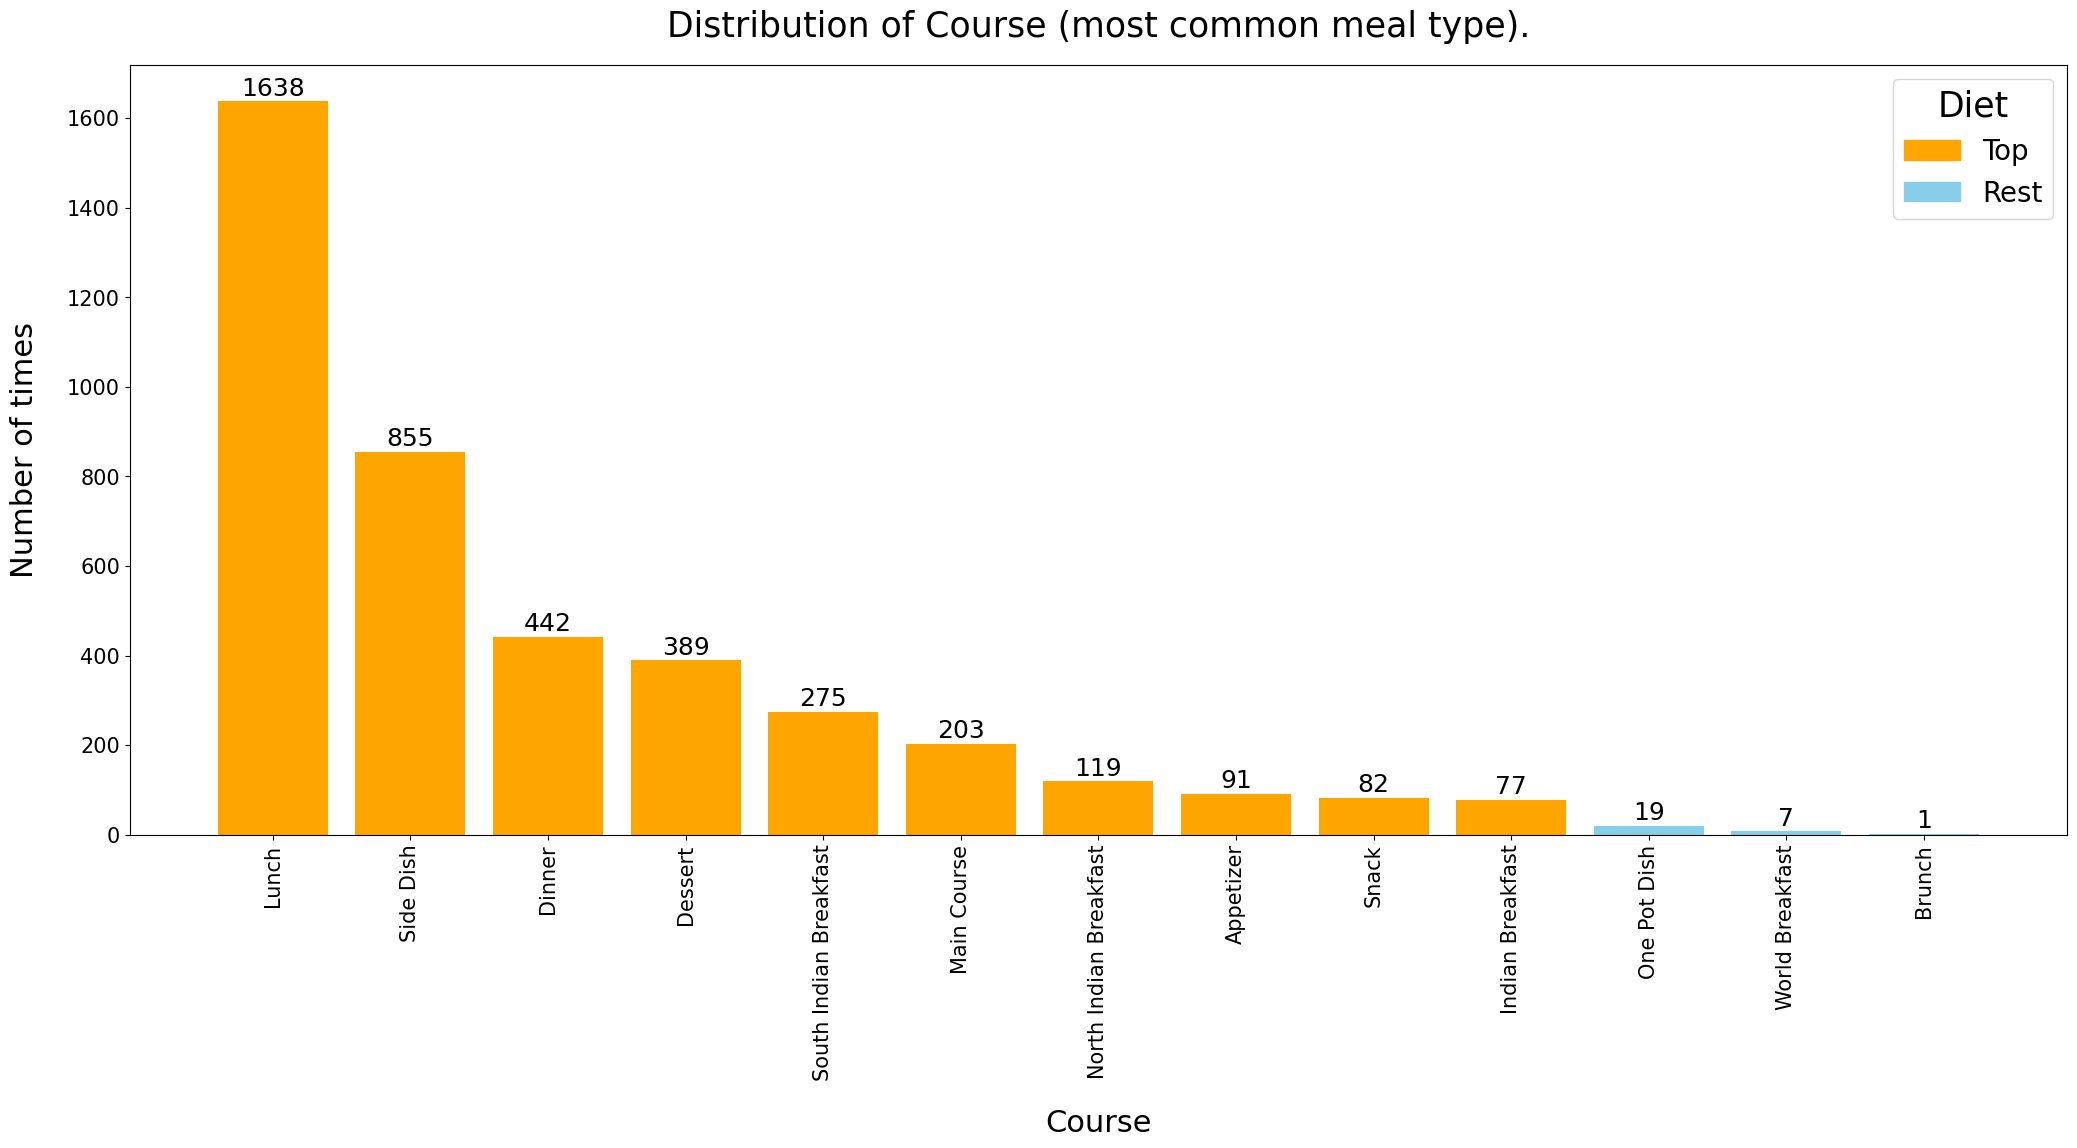

In [280]:
df_course_desc = df_course.sort_values(by='count', ascending=False).reset_index(drop=True)

top_10_course = df_course_desc[:10]

colors = ['orange' if i < 10 else 'skyblue' for i in range(len(df_course_desc))]

plt.figure(figsize=(25,10))
# plt.bar(df_course_desc['name'],df_course_desc['count'],color=colors)
bars = plt.bar(df_course_desc['name'],df_course_desc['count'],color=colors)

plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

# Create legend manually
legend_handles = [
    mpatches.Patch(color="orange", label="Top"),
    mpatches.Patch(color="skyblue", label="Rest")
]

plt.legend(handles=legend_handles, 
           title="Diet", 
           title_fontsize=25,   # title size
           fontsize=20,         # legend text size
           loc="upper right",   # placement
           bbox_to_anchor=(1, 1))  # fine-tune position

# showing values at the top of the bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height+2,str(height),ha="center",va="bottom",fontsize=18)

plt.title("Distribution of Course (most common meal type).",fontsize=25,pad=20)
plt.xlabel("Course",fontsize=22, labelpad=20)
plt.ylabel("Number of times",fontsize=22, labelpad=20)
# plt.savefig("2.Distribution of course (most common meal type).png", bbox_inches='tight')
plt.show()

<h2>Insights from Course Distribution (Meal Types)</h2>
<ul>
  <li><b>Lunch (1638 recipes)</b> is by far the most common meal type.</li>
  <li><b>Side dishes (855)</b> and <b>Dinner (442)</b> are also very popular.</li>
  <li><b>Desserts (389)</b> and <b>Breakfasts</b> (South Indian – 275, North Indian – 119) have a moderate share.</li>
  <li><b>Brunch (1)</b> and <b>World Breakfast (7)</b> are extremely rare.</li>
  <li>The dataset mainly focuses on <b>lunch and dinner recipes</b>.</li>
</ul>

<b>C.</b> Count of diet.

In [281]:
data_diet = df.groupby('diet').count()['name']
print(":::Diet with counts:::")
print()
data_diet

:::Diet with counts:::



diet
Diabetic Friendly                236
Eggetarian                        95
Gluten Free                       36
High Protein Non Vegetarian      139
High Protein Vegetarian          514
No Onion No Garlic (Sattvic)      60
Non Vegetarian                   240
Unknown                           37
Vegan                             21
Vegetarian                      2858
Name: name, dtype: int64

In [282]:
#create DataFrame
df_diet = pd.DataFrame({
    'name':data_diet.index.tolist(),'count':data_diet.values.tolist()
})
df_diet

,name,count
0,Diabetic Friendly,236
1,Eggetarian,95
2,Gluten Free,36
3,High Protein Non Vegetarian,139
4,High Protein Vegetarian,514
5,No Onion No Garlic (Sattvic),60
6,Non Vegetarian,240
7,Unknown,37
8,Vegan,21
9,Vegetarian,2858


In [283]:
df_diet_desc = df_diet.sort_values(by='count',ascending=False).reset_index(drop=True)
df_diet_desc

,name,count
0,Vegetarian,2858
1,High Protein Vegetarian,514
2,Non Vegetarian,240
3,Diabetic Friendly,236
4,High Protein Non Vegetarian,139
5,Eggetarian,95
6,No Onion No Garlic (Sattvic),60
7,Unknown,37
8,Gluten Free,36
9,Vegan,21


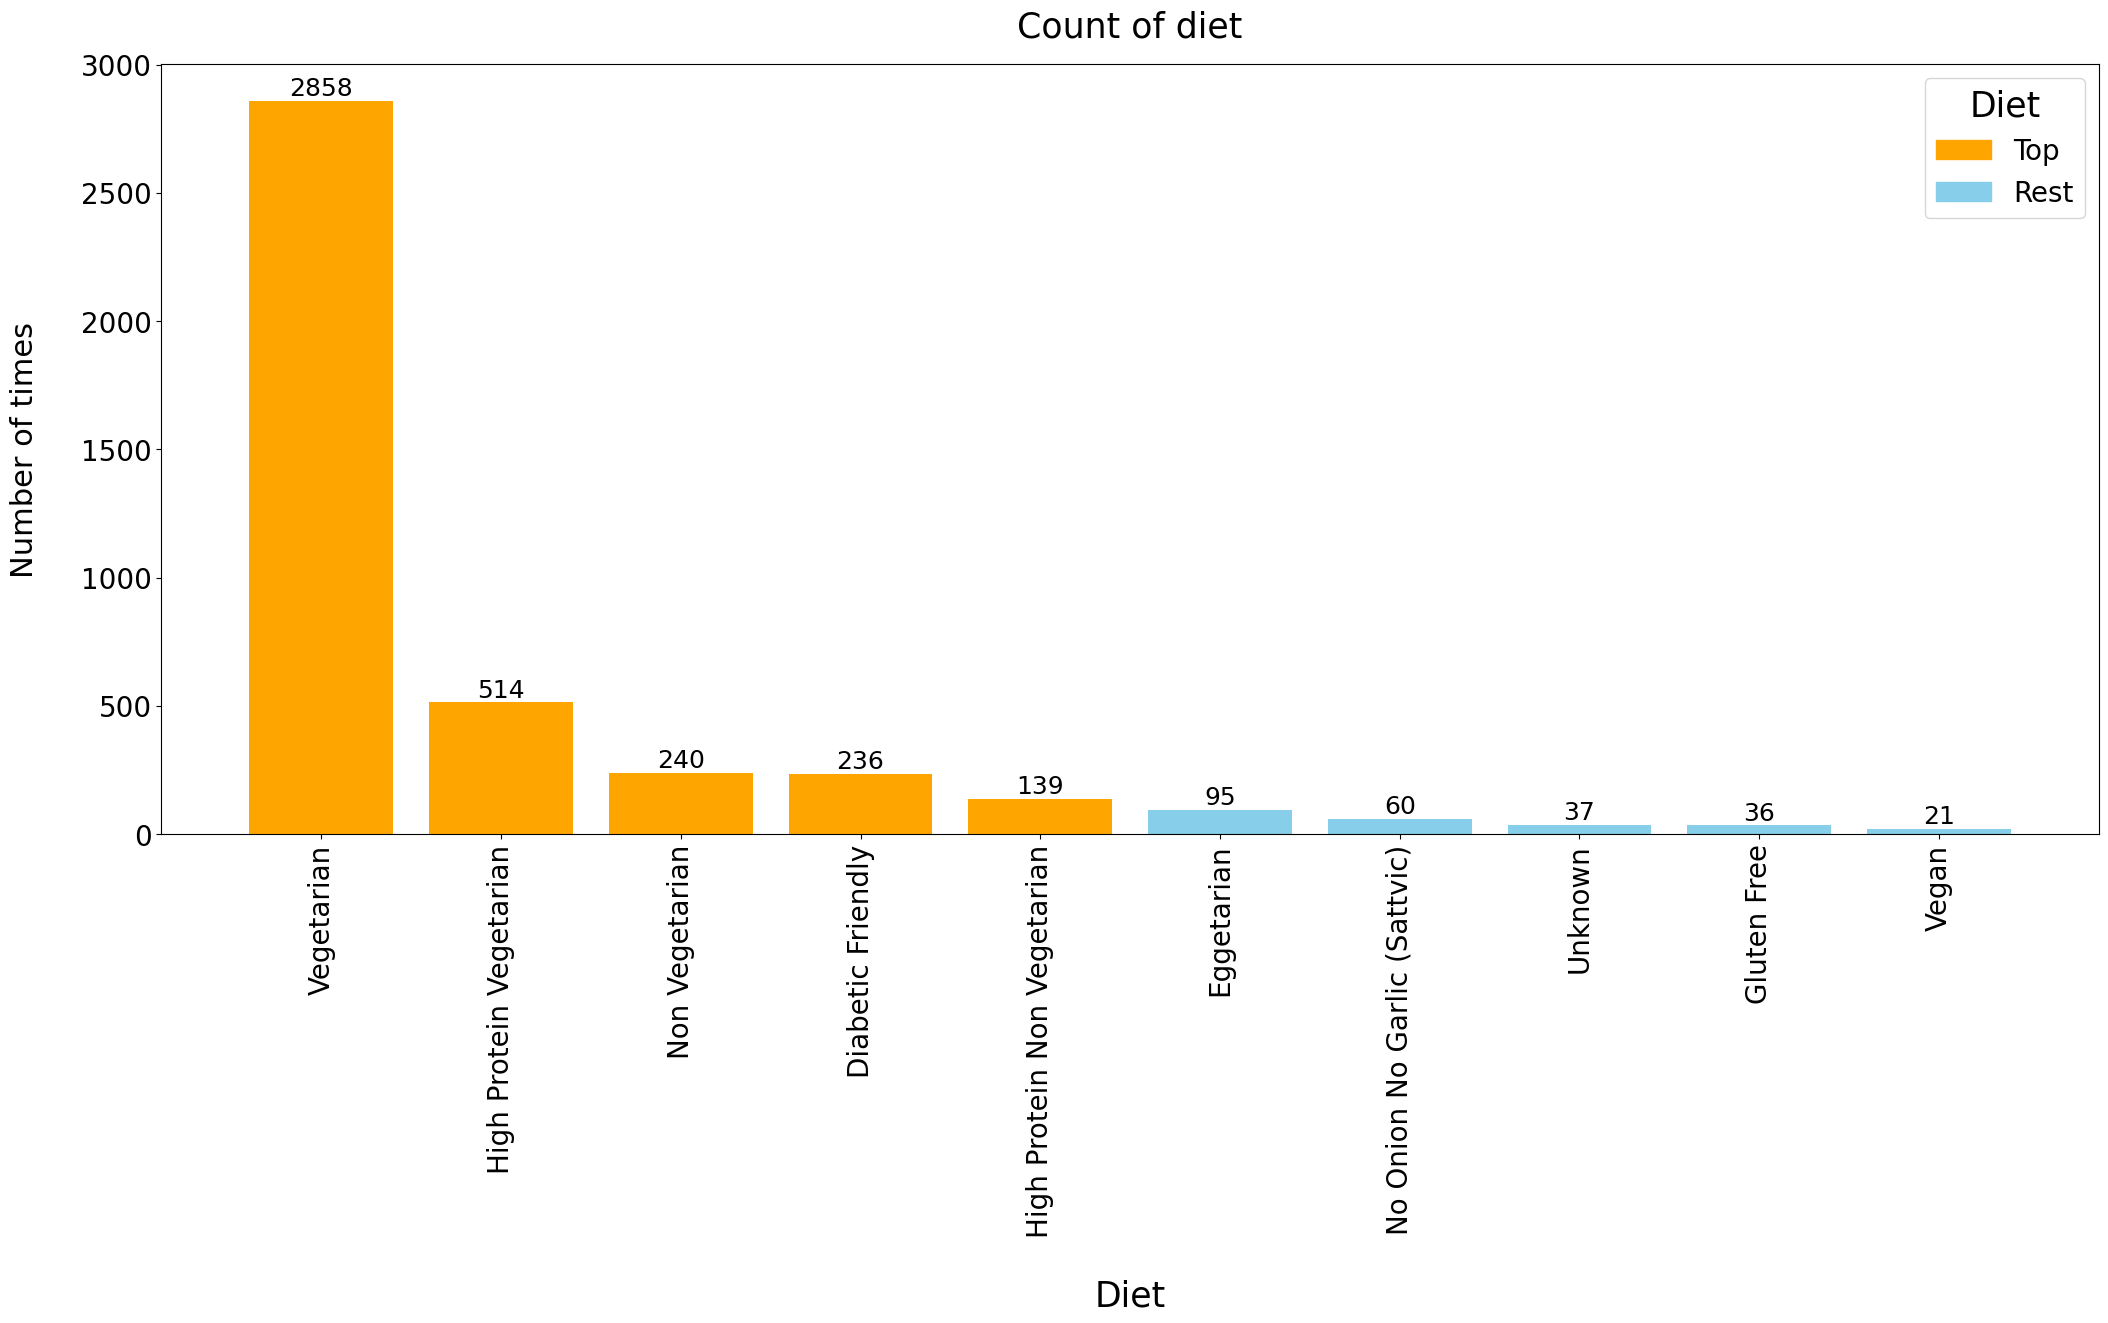

In [284]:
colors = ['orange' if i < 5 else 'skyblue' for i in range(len(df_diet_desc))]

plt.figure(figsize=(25,10))
bars = plt.bar(df_diet_desc['name'],df_diet_desc['count'],color=colors)

plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)

# Create legend manually
legend_handles = [
    mpatches.Patch(color="orange", label="Top"),
    mpatches.Patch(color="skyblue", label="Rest")
]

plt.legend(handles=legend_handles, 
           title="Diet", 
           title_fontsize=25,   # title size
           fontsize=20,         # legend text size
           loc="upper right",   # placement
           bbox_to_anchor=(1, 1))  # fine-tune position

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height,str(height),ha="center",va="bottom",fontsize=18)

plt.title("Count of diet",fontsize=25,pad=20)
plt.xlabel("Diet",fontsize=25, labelpad=30)
plt.ylabel("Number of times",fontsize=22, labelpad=30)
# plt.savefig("3.Count of diet.png", bbox_inches='tight')
plt.show()

<h2>Insights from Diet Distribution</h2>
<ul>
  <li>The dataset is overwhelmingly <b>Vegetarian (2858 recipes)</b>.</li>
  <li><b>High Protein Vegetarian (514)</b> also has a strong presence.</li>
  <li>Non-vegetarian options are limited: <b>Non-Veg (240)</b> and <b>High Protein Non-Veg (139)</b>.</li>
  <li>Special diets like <b>Diabetic Friendly (236)</b> and <b>Eggetarian (95)</b> exist in smaller proportions.</li>
  <li>Niche categories like <b>Gluten Free (36)</b> and <b>Vegan (21)</b> are very limited.</li>
  <li>Overall, the dataset is <b>heavily vegetarian-biased</b>.</li>
</ul>

<b>D.</b> Distribution of preparation times (histogram).

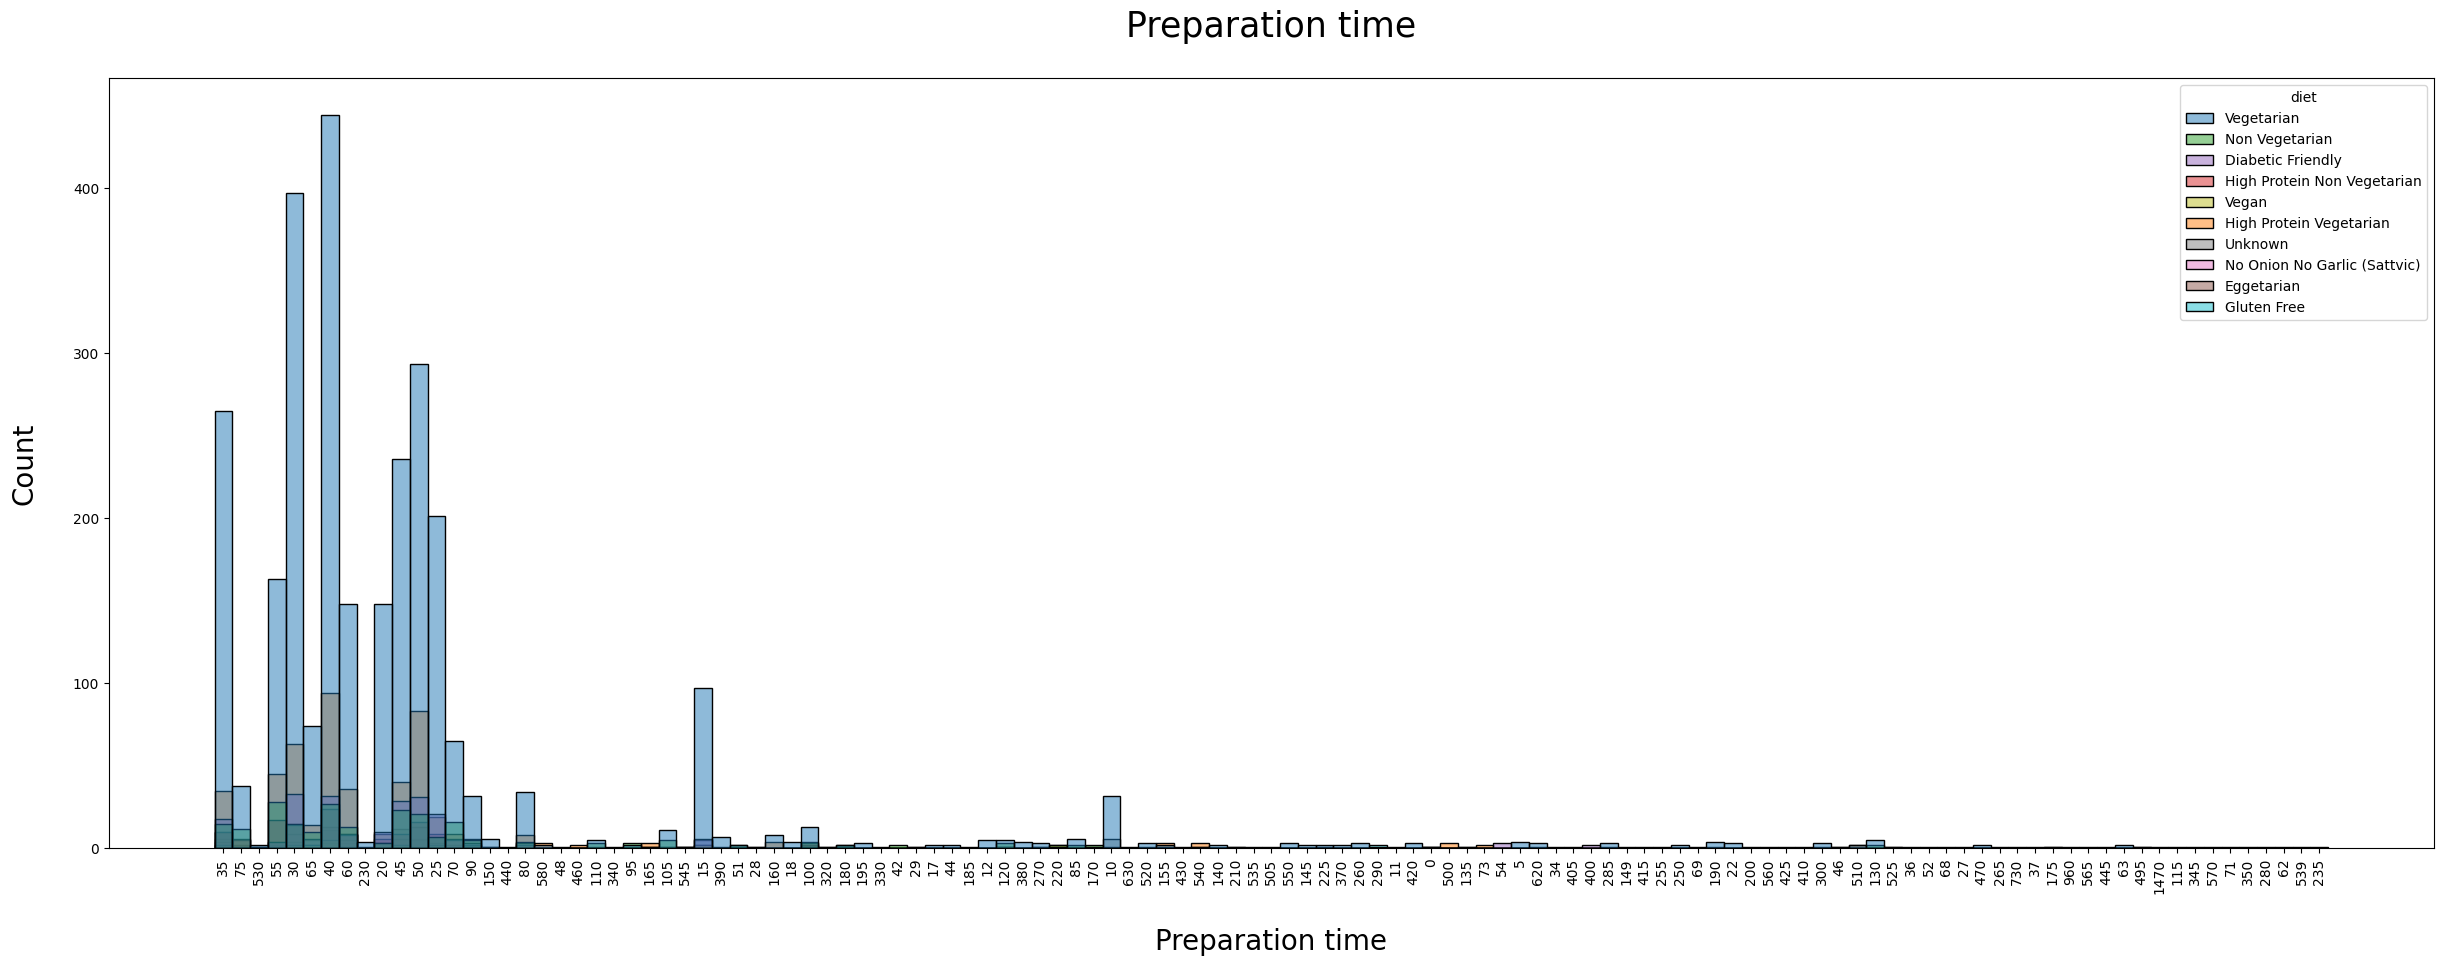

In [285]:
custom_palette = {
    "Vegetarian": "#1f77b4",              # Blue
    "High Protein Vegetarian": "#ff7f0e", # Orange
    "Non Vegetarian": "#2ca02c",          # Green
    "High Protein Non Vegetarian": "#d62728", # Red
    "Diabetic Friendly": "#9467bd",       # Purple
    "Eggetarian": "#8c564b",              # Brown
    "No Onion No Garlic (Sattvic)": "#e377c2", # Pink
    "Unknown": "#7f7f7f",                 # Gray
    "Vegan": "#bcbd22",                   # Olive
    "Gluten Free": "#17becf"              # Cyan
}

plt.figure(figsize=(30,10))
plt.xticks(rotation=90,fontsize=10)
plt.title("Preparation time",fontsize=25,pad=30)
sns.histplot(data=df,x='prep_time',hue='diet', palette=custom_palette)
plt.xlabel("Preparation time",fontsize=20,labelpad=25)
plt.ylabel("Count",fontsize=20,labelpad=25)
plt.savefig("4.Preparation time.png", bbox_inches='tight')
plt.show()

<h2>Insights from Preparation Time Distribution</h2>
<ul>
  <li>Most recipes fall within <b>20–70 minutes</b> of preparation time.</li>
  <li>The highest concentration of recipes is around <b>35–55 minutes</b>.</li>
  <li>Recipes with preparation times longer than <b>100 minutes</b> are much less common.</li>
  <li>Very long preparation times (<b>200+ minutes</b>) are rare outliers.</li>
  <li>All diet types (Vegetarian, Non-Vegetarian, Vegan, etc.) follow a similar pattern, clustering in the shorter preparation times.</li>
</ul>


In [286]:
# Univariate Analysis Report

html_code = """
<h1 style="text-align:center;">Food Dataset Insights</h1>

<!-- Cuisine Distribution -->
<h2 style="color:#ff6600;">1. Distribution of Cuisines</h2>
<img src="http://localhost:8888/files/1.Distribution%20of%20cuisines%20with%20top%20highlighted.png?_xsrf=2%7Cb10512f9%7C49d91a23bfe745785d07635f733df02f%7C1756455993" width="1000">
<p>
    - <b>North Indian, South Indian, and Indian recipes</b> dominate with over <b>600–800 entries</b> each.<br>
    - These three categories alone form the majority of recipes.<br>
    - <b>Bengali, Tamil Nadu, Kerala, and Maharashtrian</b> cuisines are moderately represented (100–160 recipes).<br>
    - <b>Thai, Afghan, African</b> cuisines are rare (1–5 recipes).<br>
    - Overall, the dataset is highly skewed towards Indian regional cuisines.
</p>

<!-- Course Distribution -->
<h2 style="color:#ff6600;">2. Distribution of Courses (Meal Types)</h2>
<img src="http://localhost:8888/files/2.Distribution%20of%20course%20(most%20common%20meal%20type).png?_xsrf=2%7Cb10512f9%7C49d91a23bfe745785d07635f733df02f%7C1756455993" width="1000">
<p>
    - <b>Lunch (1638 recipes)</b> is the most common meal type.<br>
    - <b>Side dishes (855)</b> and <b>Dinner (442)</b> are also popular.<br>
    - <b>Desserts (389)</b> and <b>Breakfasts</b> (South Indian – 275, North Indian – 119) appear often.<br>
    - Rare types: <b>Brunch (1)</b>, <b>World Breakfast (7)</b>.<br>
    - The dataset mainly focuses on <b>lunch and dinner</b>.
</p>

<!-- Diet Distribution -->
<h2 style="color:#ff6600;">3. Distribution of Diet Types</h2>
<img src="http://localhost:8888/files/3.Count%20of%20diet%20(Veg%20vs.%20Non-Veg).png?_xsrf=2%7Cb10512f9%7C49d91a23bfe745785d07635f733df02f%7C1756455993" width="1000">
<p>
    - Majority are <b>Vegetarian (2858 recipes)</b>.<br>
    - <b>High Protein Vegetarian (514)</b> is also significant.<br>
    - Non-vegetarian: <b>Non-Veg (240)</b>, <b>High Protein Non-Veg (139)</b>.<br>
    - Special diets: <b>Diabetic Friendly (236)</b>, <b>Eggetarian (95)</b>.<br>
    - Rare: <b>Gluten Free (36)</b>, <b>Vegan (21)</b>.<br>
    - Overall, the dataset is <b>heavily vegetarian-biased</b>.
</p>

<!-- Diet Distribution -->
<h2 style="color:#ff6600;">Insights from Preparation Time Distribution</h2>
<img src="http://localhost:8888/files/3.Count%20of%20diet%20(Veg%20vs.%20Non-Veg).png?_xsrf=2%7Cb10512f9%7C49d91a23bfe745785d07635f733df02f%7C1756455993" width="1000">
<p>
    - Majority are <b>Vegetarian (2858 recipes)</b>.<br>
    - <b>High Protein Vegetarian (514)</b> is also significant.<br>
    - Non-vegetarian: <b>Non-Veg (240)</b>, <b>High Protein Non-Veg (139)</b>.<br>
    - Special diets: <b>Diabetic Friendly (236)</b>, <b>Eggetarian (95)</b>.<br>
    - Rare: <b>Gluten Free (36)</b>, <b>Vegan (21)</b>.<br>
    - Overall, the dataset is <b>heavily vegetarian-biased</b>.
</p>

<!-- Preparation Time Distribution -->
<h2 style="color:#ff6600;">Insights from Preparation Time Distribution</h2>
<img src="http://localhost:8888/files/4.Preparation%20time.png?_xsrf=2%7Cb10512f9%7C49d91a23bfe745785d07635f733df02f%7C1756455993" width="1000">
<p>
    - Most recipes fall within <b>20–70 minutes</b> of preparation time.<br>
    - The highest concentration of recipes is around <b>35–55 minutes</b>.<br>
    - Recipes longer than <b>100 minutes</b> are much less common.<br>
    - Very long preparation times (<b>200+ minutes</b>) are rare outliers.<br>
    - All diet types (Vegetarian, Non-Vegetarian, Vegan, etc.) follow a similar short-time pattern.
</p>

"""

# display(HTML(html_code))

>***4. Bivariate Analysis***

<b>A.</b> Compare average preparation time across cuisines.

In [287]:
# df.head(5)

In [288]:
df['prep_time'] = df['prep_time'].astype('float32') #convert prep_time to float32

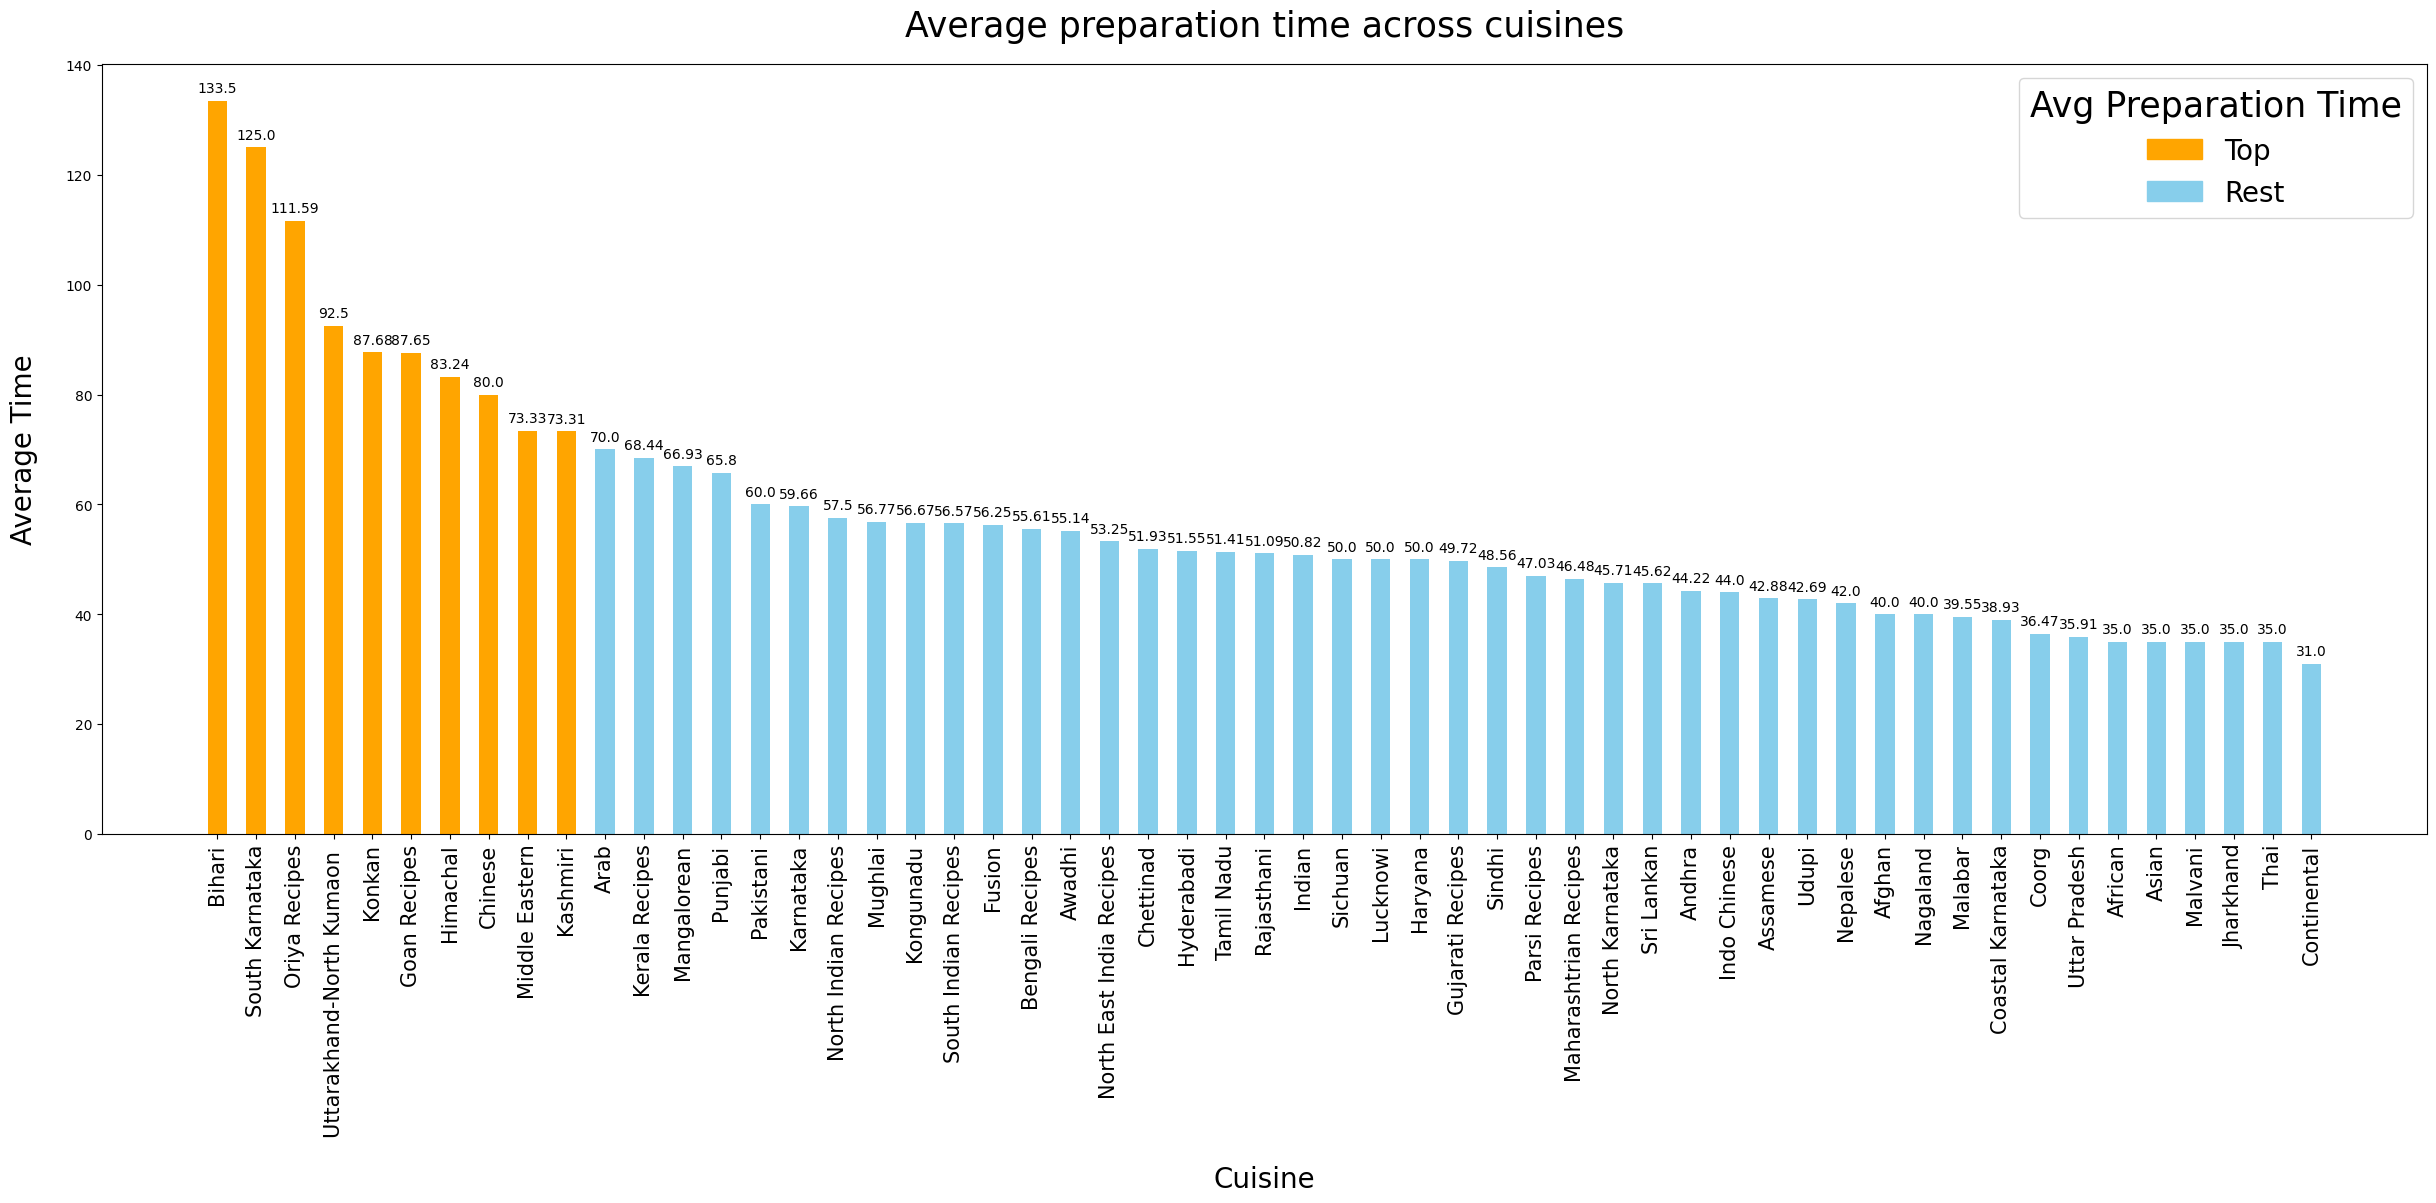

In [289]:
data_cuisine_average = df.groupby('cuisine').agg({
    "prep_time":"mean"
})

avg_prep_time=[]

# data_cuisine_average.values.tolist()
for val in data_cuisine_average.values.tolist():
    for v in val:
        avg_prep_time.append(round(v,2))
        

data_cuisine = pd.DataFrame({
    "name" : data_cuisine_average.index.tolist(),
    "avg_time" : avg_prep_time
})

data_cuisine_desc = data_cuisine.sort_values(by='avg_time',ascending=False).reset_index(drop=True)

colors = ['orange' if i < 10 else 'skyblue' for i in range(len(data_cuisine_desc))]

plt.figure(figsize=(30,10))

# Create legend manually
legend_handles = [
    mpatches.Patch(color="orange", label="Top"),
    mpatches.Patch(color="skyblue", label="Rest")
]

plt.legend(handles=legend_handles, 
           title="Avg Preparation Time", 
           title_fontsize=25,   # title size
           fontsize=20,         # legend text size
           loc="upper right",   # placement
           bbox_to_anchor=(1, 1))  # fine-tune position


plt.xticks(rotation=90,fontsize=15)

bars = plt.bar(data_cuisine_desc['name'],data_cuisine_desc['avg_time'],color=colors,width=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height+1,str(height),ha="center",va="bottom",fontsize=10)

plt.title("Average preparation time across cuisines",fontsize=25,pad=20)
plt.xlabel("Cuisine",fontsize=20,labelpad=20)
plt.ylabel("Average Time",fontsize=20,labelpad=20)
plt.savefig("Bivariate Analysis/1. Compare average preparation time across cuisines.png",bbox_inches="tight")
plt.show()

<b>B.</b> Check relationship between course and diet.

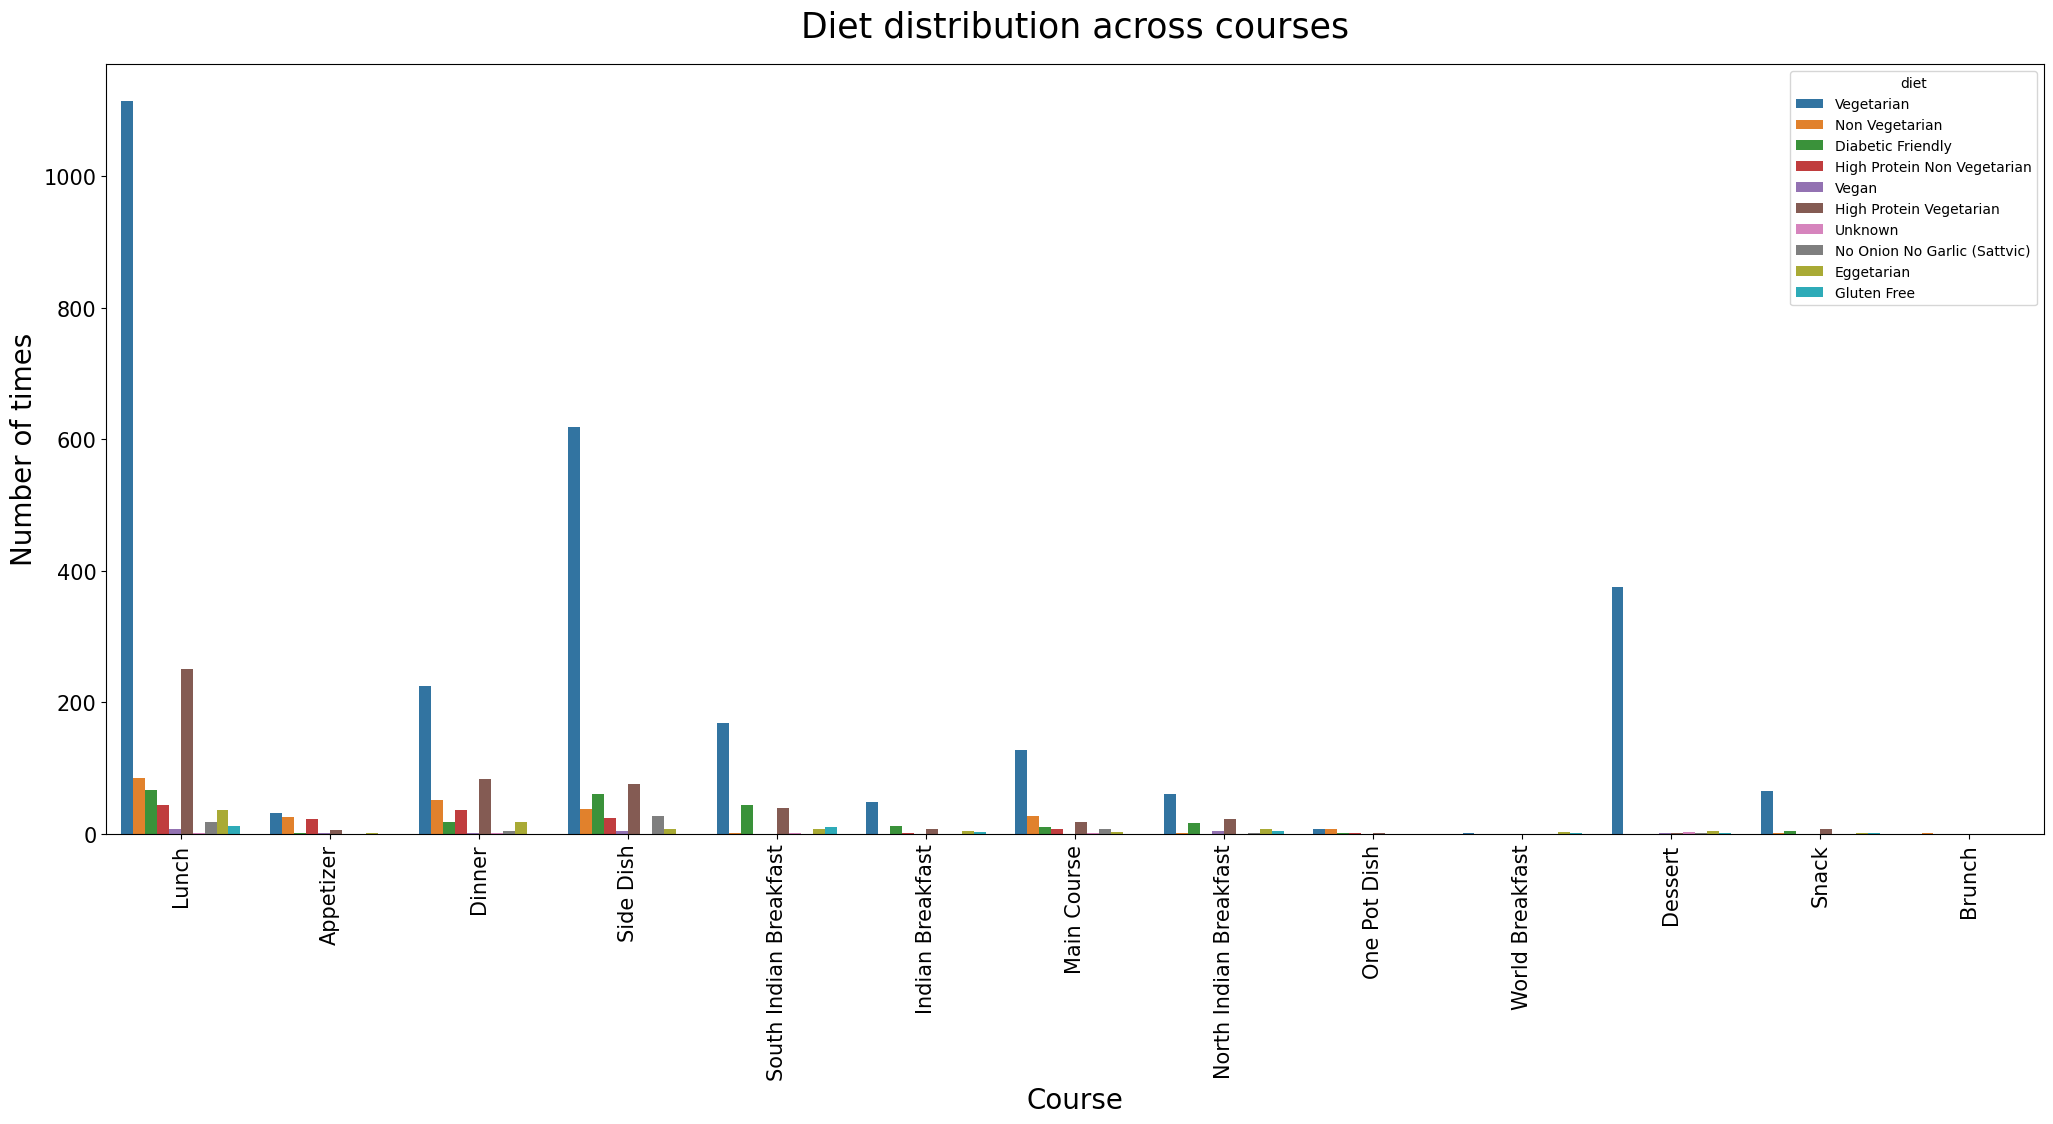

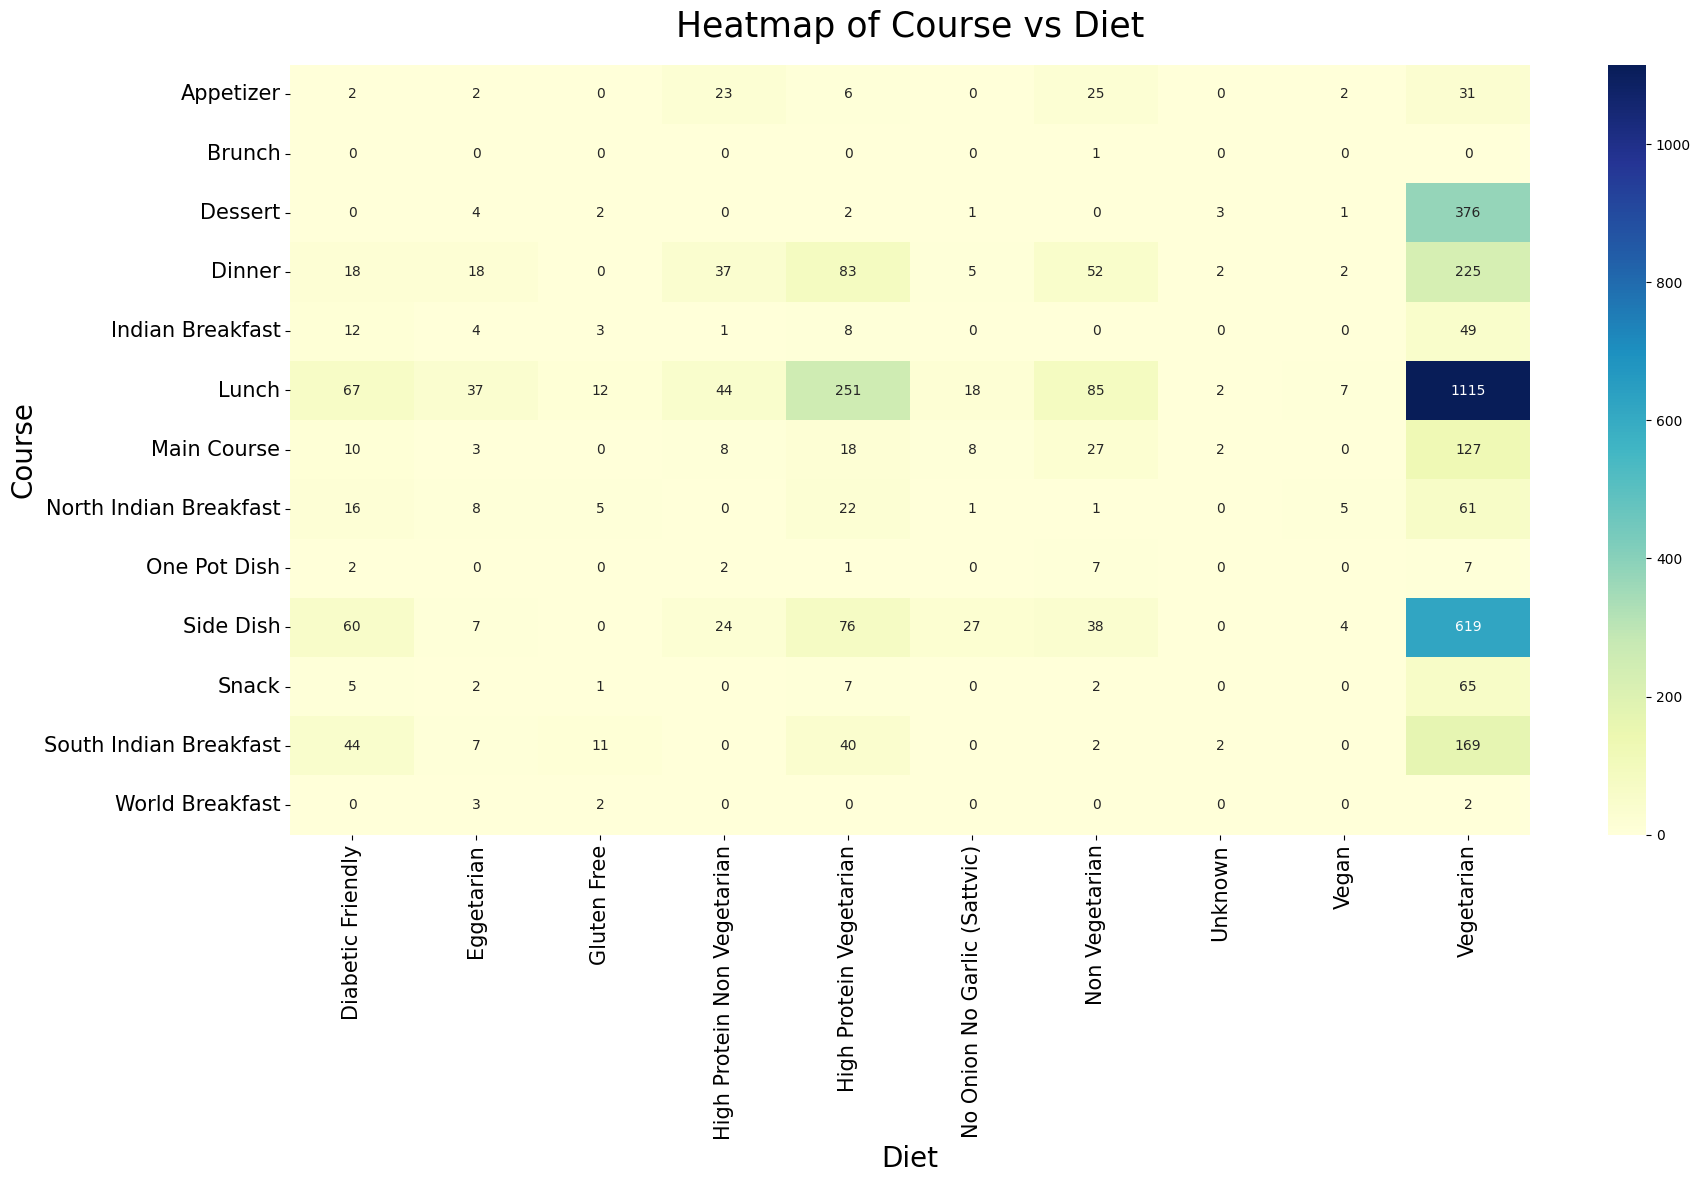

In [290]:
relationship = pd.crosstab(df['course'], df['diet'])
# print(relationship)

plt.figure(figsize=(25,10))

# Make countplot
ax = sns.countplot(data=df, x='course', hue='diet', width=0.8)  # width controls bar thickness

# Add values on top of bars
# for p in ax.patches:
#     height = p.get_height()
#     ax.annotate(f'{height}',                      # text = bar height (count)
#                 (p.get_x() + p.get_width() / 2., height),  # position
#                 ha='center', va='bottom', fontsize=12, color='black')

# Customize labels and ticks
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Diet distribution across courses', fontsize=25,pad=20)
plt.xlabel("Course", fontsize=20)
plt.ylabel("Number of times", fontsize=20)
# plt.savefig("Bivariate Analysis/2. Diet distribution across courses.png",bbox_inches="tight")
plt.show()

print()

plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
sns.heatmap(relationship, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Course vs Diet', fontsize=25,pad=20)
plt.xlabel("Diet", fontsize=20)
plt.ylabel("Course", fontsize=20)
# plt.savefig("Bivariate Analysis/2.1. Heatmap of Course vs Diet.png",bbox_inches="tight")
plt.show()

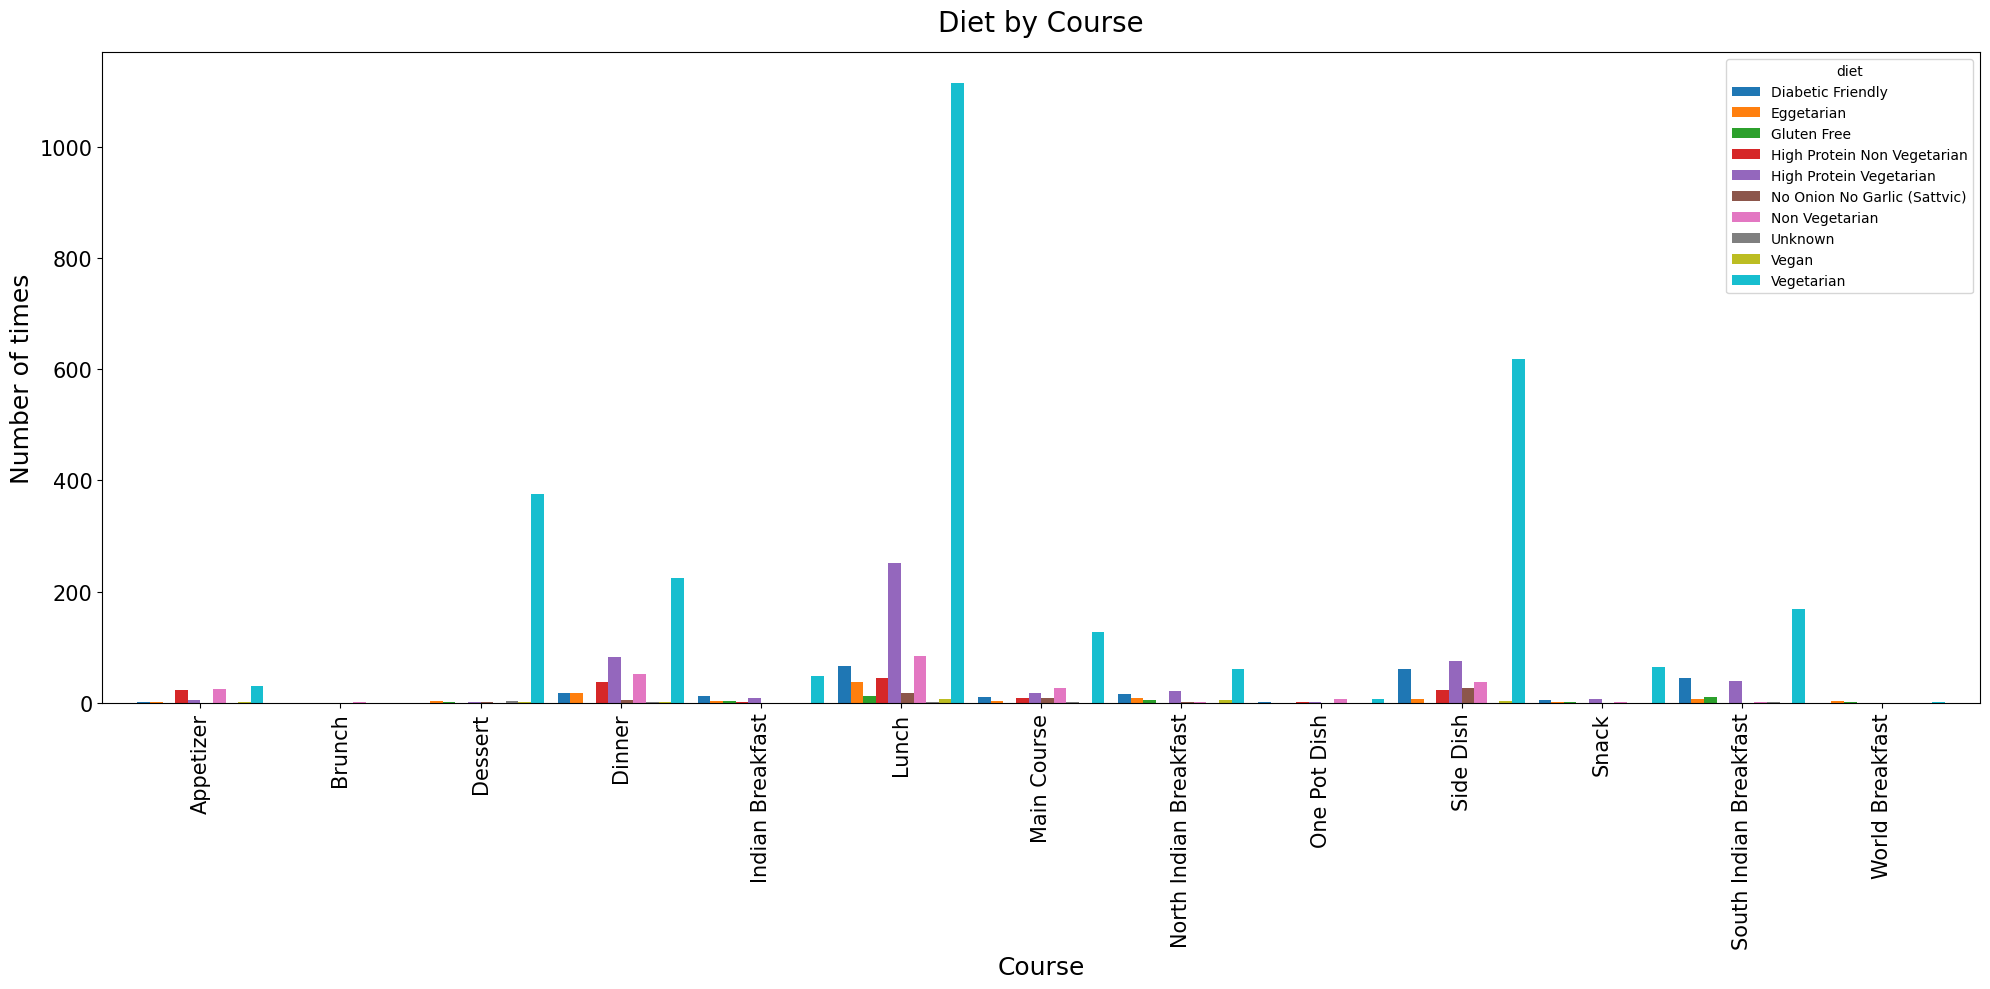

In [291]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=100)
relationship.plot(kind='bar', stacked=False, ax=ax, width=0.9)

ax.set_title('Diet by Course', fontsize=20,pad=15)
ax.set_xlabel('Course', fontsize=18)
ax.set_ylabel('Number of times', fontsize=18)
ax.tick_params(axis='x', rotation=90, labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
# plt.savefig("Bivariate Analysis/2.2. Diet by Course.png",bbox_inches="tight")
plt.show()

>***5. Outlier & Anomaly Detection***

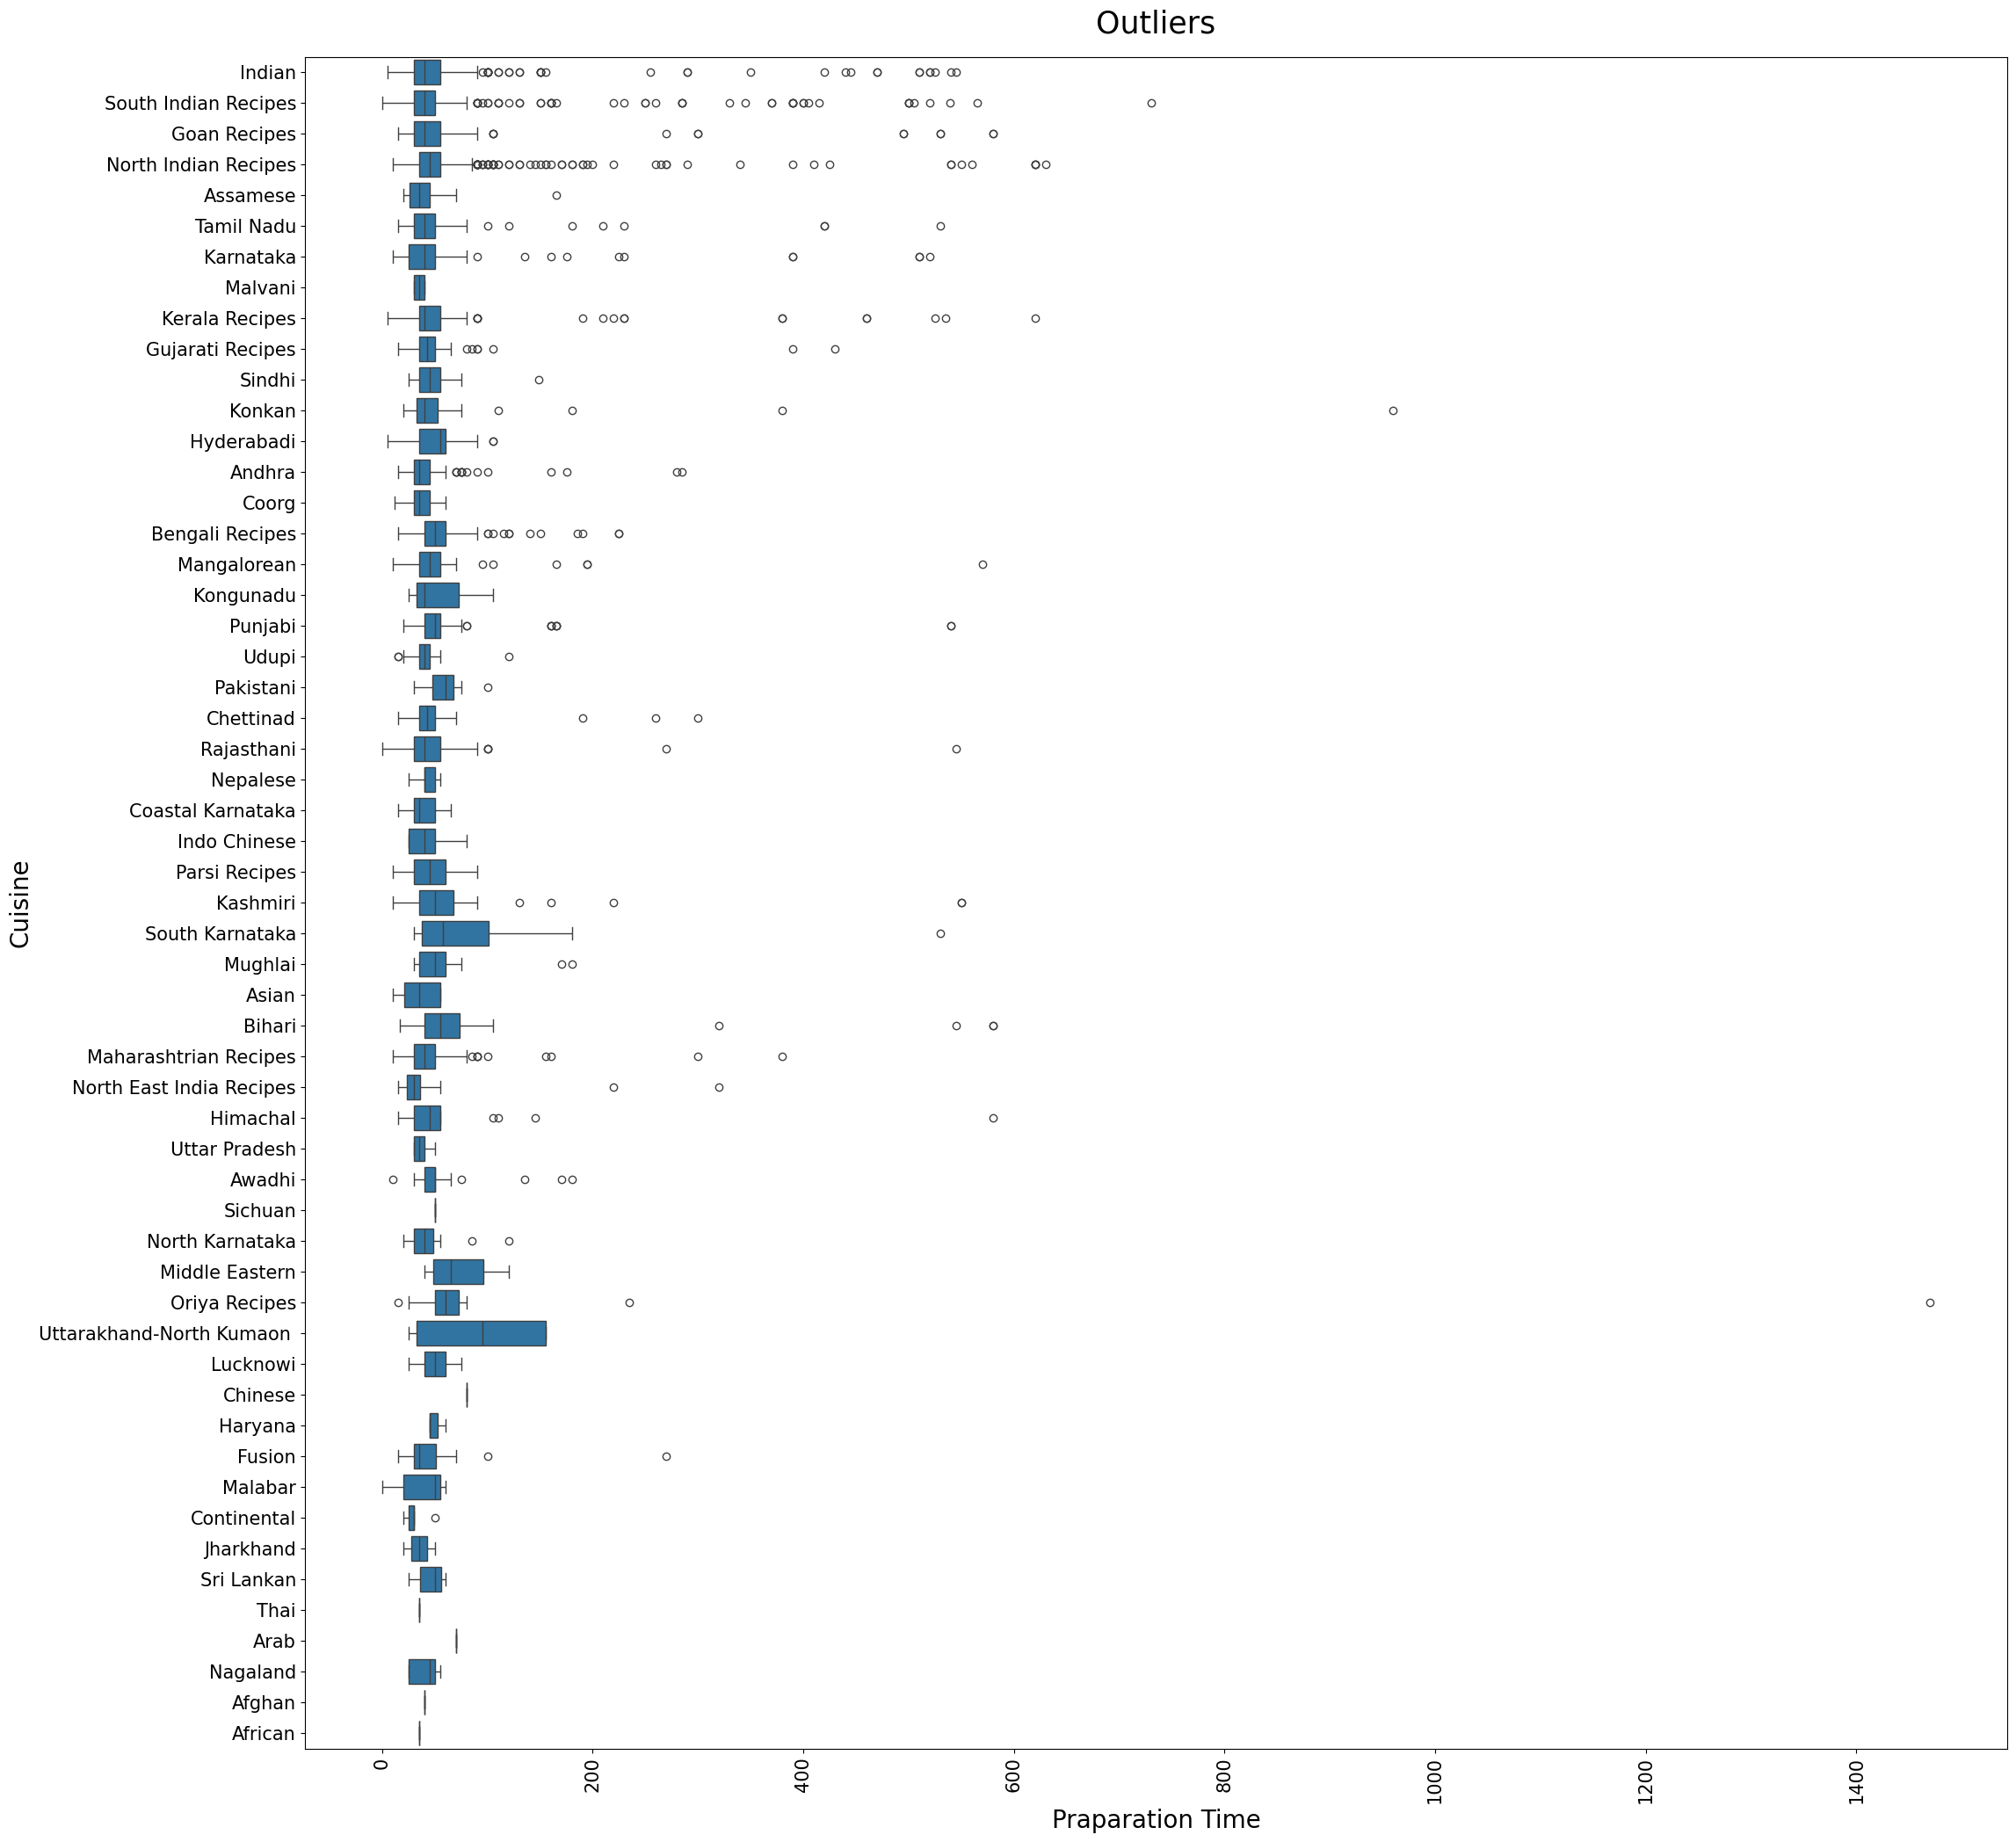

In [292]:
plt.figure(figsize=(25,25))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Outliers', fontsize=25,pad=20)
sns.boxplot(df,x='prep_time',y='cuisine')
plt.xlabel("Praparation Time", fontsize=20)
plt.ylabel("Cuisine", fontsize=20)
# plt.savefig("1. Outliiers.png",bbox_inches="tight")
plt.show()

In [293]:
# Removing outliers

Q1 = df['prep_time'].quantile(0.25)
Q3 = df['prep_time'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['prep_time'] >= lower_bound)&(df['prep_time'] <= upper_bound)]

print("\n1. Original Shape:",df.shape[0])
print("\n2. No Outliers Shape:",df_no_outliers.shape[0])
print("\n3. Number of outliers:",df.shape[0]-df_no_outliers.shape[0])
print("\nAfter Removing Outliers:\n")
df_no_outliers


1. Original Shape: 4236

2. No Outliers Shape: 3962

3. Number of outliers: 274

After Removing Outliers:



,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions
0,Thayir Semiya Recipe (Curd Semiya),https://www.archanaskitchen.com/images/archana...,Thayir Semiya or Curd Vermicelli is a quick di...,Indian,Lunch,Vegetarian,35.0,"1/2 cup Semiya (Vermicelli) , roasted 1 cup Cu...","To begin making the Thayir Semiya recipe, firs..."
1,Chettinad Style Kara Kuzhambu Recipe with Pota...,https://www.archanaskitchen.com/images/archana...,Chettinad Style Kara Kuzhambu Recipe with Pot...,South Indian Recipes,Lunch,Vegetarian,75.0,For ground masala 1/4 teaspoon Methi Seeds (Fe...,To begin making the Chettinad Style Kara Kuzha...
3,Minced Meat And Egg Croquettes Recipe,https://www.archanaskitchen.com/images/archana...,The croquette is usually cigar shaped or cylin...,North Indian Recipes,Appetizer,Non Vegetarian,55.0,"500 grams Mutton , minced 4 Whole Eggs , boile...",To begin making the Minced Meat And Egg Croque...
4,Thekera Tenga Recipe,https://www.archanaskitchen.com/images/archana...,Thekera Tenga is a Sour curry from Assamese cu...,Assamese,Dinner,Vegetarian,30.0,"4 Potatoes (Aloo) , thinly sliced 1 tablespoon...","To begin making the Thekera Tenga recipe, Heat..."
5,Spicy Cabbage Rice Recipe (South Indian Style ...,https://www.archanaskitchen.com/images/archana...,Spicy Cabbage Rice takes very few ingredients ...,Indian,Lunch,Vegetarian,65.0,"2 cups Cooked rice Ghee , or oil as required 1...","To prepare Spicy Cabbage Rice recipe, firstly ..."
...,...,...,...,...,...,...,...,...,...
4231,Stir Fry Green beans and Tofu with Panch Phoro...,https://www.archanaskitchen.com/images/archana...,Stir Fry Green beans and Tofu with Panch Phoro...,Bengali Recipes,Side Dish,Vegetarian,40.0,"1 cup Green beans (French Beans) , chopped int...",We begin making the Stir Fry Green beans and T...
4232,Dhuska Recipe (Rice Fried Bread),https://www.archanaskitchen.com/images/archana...,Dhuska is a traditional recipe from Jharkhand....,Jharkhand,Snack,Vegetarian,50.0,"1 cup Basmati rice , washed and soaked in wate...","To begin making the Dhuska, grind rice and cha..."
4233,Khatta Meetha Petha Recipe (Yellow Pumpkin Sabzi),https://www.archanaskitchen.com/images/archana...,Khatta Meetha Petha or sweet and sour yellow p...,Indian,Lunch,Vegetarian,40.0,1 Kaddu (Parangikai/ Pumpkin) 4 Green Chillies...,"To begin making the Yellow Pumpkin Sabzi, firs..."
4234,Patta Gobi Matar Nu Shaak Recipe (Cabbage & Pe...,https://www.archanaskitchen.com/images/archana...,Patta Gobi Matar Nu Shaak Recipe (Cabbage & Pe...,North Indian Recipes,Lunch,Vegetarian,25.0,"3 cups Cabbage (Patta Gobi/ Muttaikose) , fine...","To begin making the Patta Gobi Matar Nu Shaak,..."


>***6.Visualizations***

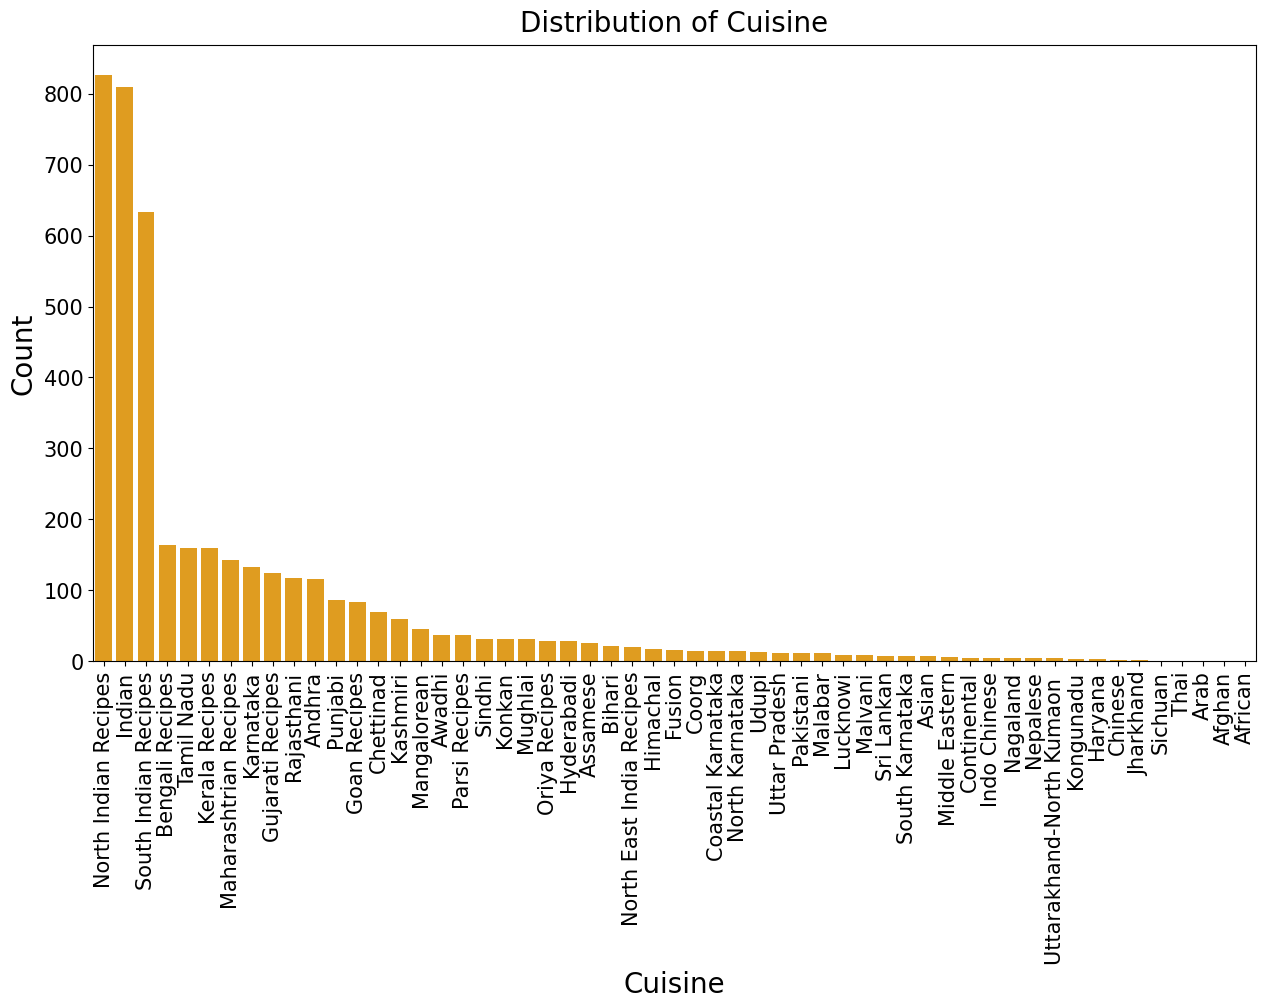

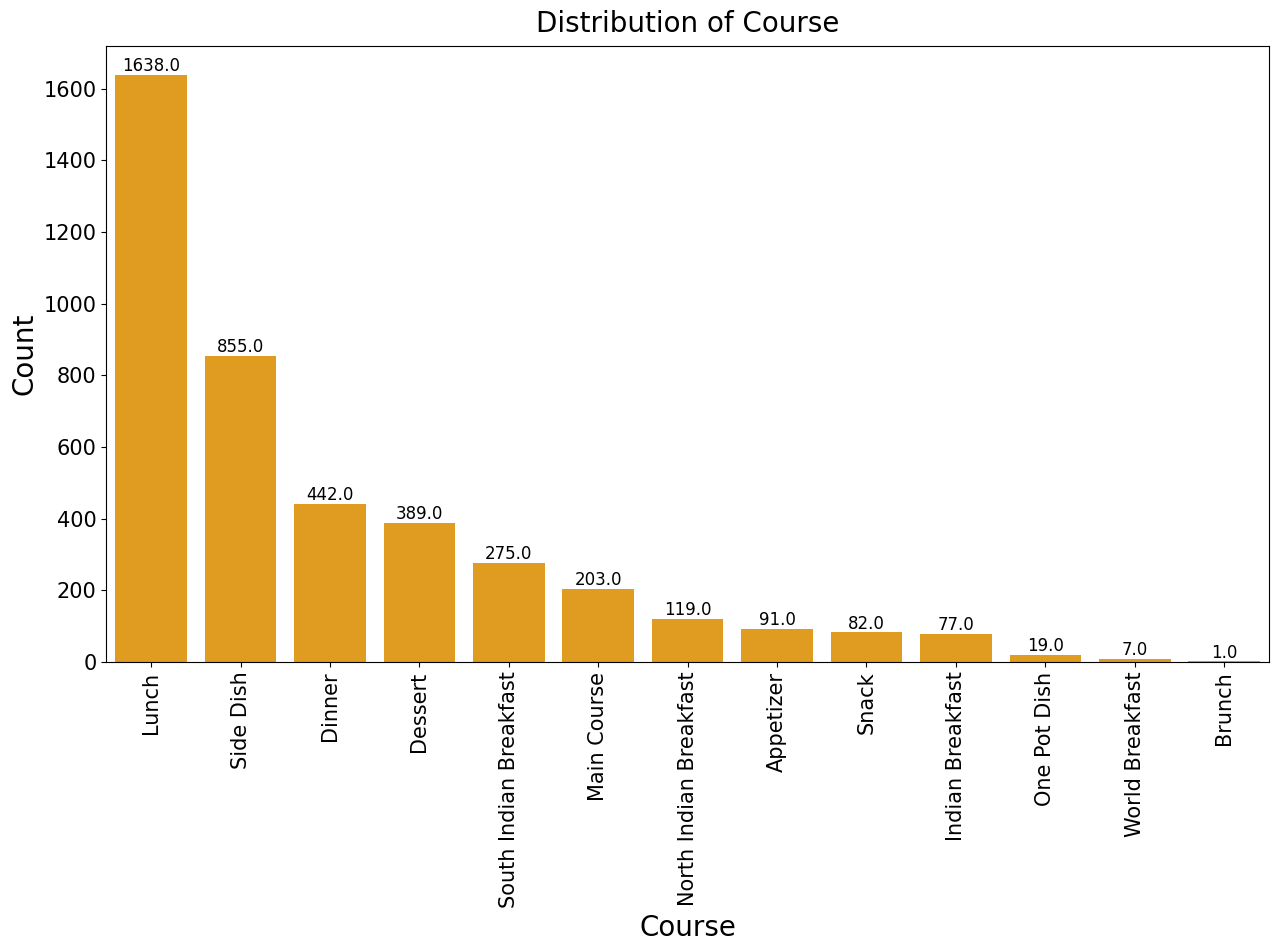

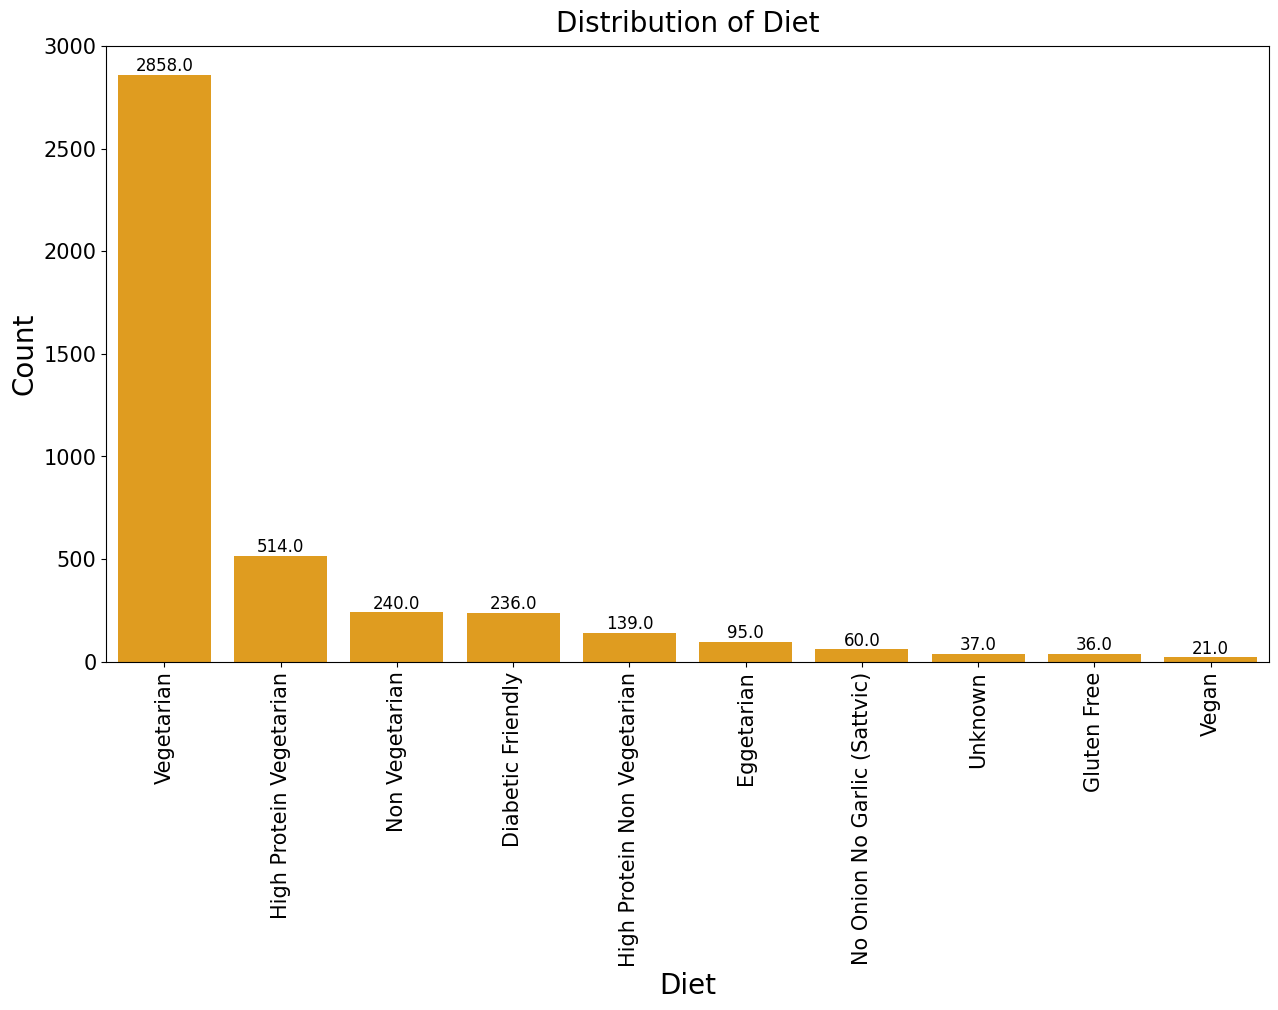

In [294]:
categorical_columns = ['cuisine', 'course', 'diet']

for col in categorical_columns:
    plt.figure(figsize=(15,8))
    
    ax = sns.countplot(
        data=df,x=col,order=df[col].value_counts().index,color='orange'
        ,hue=None,legend=False
    )

    if col in ['course', 'diet']:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(str(height),(p.get_x() + p.get_width()/2.,height),ha="center",va="bottom",fontsize=12,color='black')
        
    plt.title(f"Distribution of {col.capitalize()}",fontsize=20,pad=10)
    plt.xlabel(col.capitalize(), fontsize=20)
    plt.ylabel("Count", fontsize=20)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    # plt.savefig(f"1. Distribution of {col.capitalize()}.png",bbox_inches="tight")
    plt.show()

>***7. Insights & Summary***

<h1>Key Findings</h1>
<ul>
  <li>North Indian, South Indian, and Indian recipes dominate with over 600–800 entries each.</li>
  <li>Vegetarian dishes are more common at the Lunch course.</li>
  <li>Most recipes fall within 20–70 minutes of preparation time.</li>
</ul>

<h1 style="color:red;font-weight:700;">END</h1>